In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import scipy as sci
import importlib

from turtle import width
import plotly.express as px

#self created library
import plot_utils

#settings
%load_ext autoreload
%autoreload 3
%config InteractiveShell.ast_node_interactivity = 'all'


In [10]:
#figre options
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [9]:
from data import credit_data_reader
df = credit_data_reader.credit_data_reader()

In [5]:
#How to clean up this mess?...
#US instrument yields
us_corp_high = df[df['name'] == df['name'].unique()[0]]
us_corp_ig = df[df['name'] == df['name'].unique()[1]]
us3 = df[df['name'] == df['name'].unique()[2]]
us5 = df[df['name'] == df['name'].unique()[3]]
us10 = df[df['name'] == df['name'].unique()[4]]
sp_tr = df[df['name'] == df['name'].unique()[5]]

#UK instrument yields
uk_corp_ig = df[df['name'] == df['name'].unique()[6]]
uk3 = df[df['name'] == df['name'].unique()[7]]
uk5 = df[df['name'] == df['name'].unique()[8]]
uk10 = df[df['name'] == df['name'].unique()[9]]
ftse_tr = df[df['name'] == df['name'].unique()[10]]

#German instrument yields
ger_tr = df[df['name'] == df['name'].unique()[11]]
ger3 = df[df['name'] == df['name'].unique()[12]]
ger5 = df[df['name'] == df['name'].unique()[13]]
ger10 = df[df['name'] == df['name'].unique()[14]]
dax = df[df['name'] == df['name'].unique()[15]]

us_corp_high = us_corp_high.drop('yield',axis=1).tail(len(us_corp_high)-181)    # remove first 181 values because they are not split evenly on a weekly basis,
us_corp_ig = us_corp_ig.drop('yield',axis=1).tail(len(us_corp_ig)-194)    # remove first 193 values because they are not split evenly on a weekly basis,
us3 = us3.drop('last_price',axis=1)
us5 = us5.drop('last_price',axis=1)
us10 = us10.drop('last_price',axis=1)
sp_tr = sp_tr.drop('yield',axis=1)

uk_corp_ig = uk_corp_ig.drop('yield',axis=1)
uk3 = uk3.drop('last_price',axis=1)
uk5 = uk5.drop('last_price',axis=1)
uk10 = uk10.drop('last_price',axis=1)
ftse_tr = ftse_tr.drop('yield',axis=1)

ger_tr = ger_tr.drop('yield',axis=1)
ger3 = ger3.drop('last_price',axis=1)
ger5 = ger5.drop('last_price',axis=1)
ger10 = ger10.drop('last_price',axis=1)
dax = dax.drop('yield',axis=1)

[Text(0.5, 1.0, '3 years rolling correlation: DAX INDEX; GER GOVT BOND 10Y')]

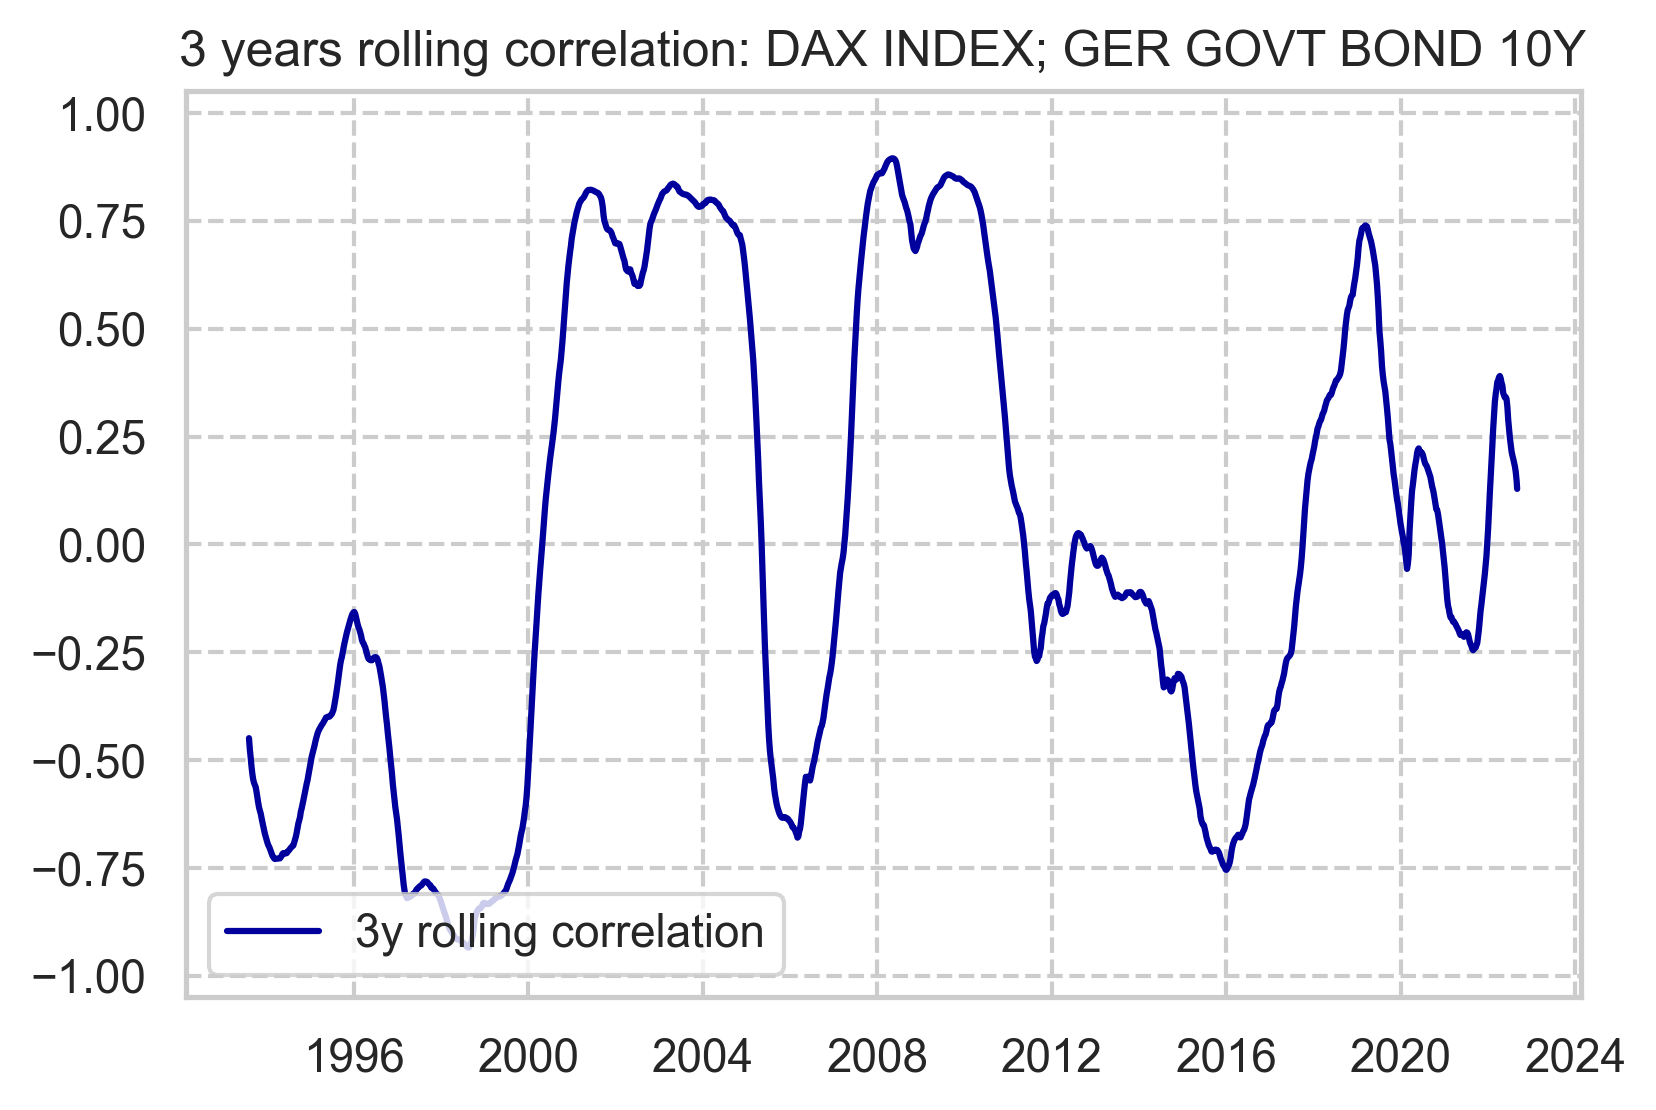

In [11]:
# German Correlations, rolling
weeks = 156
# plot_utils.corr_plot_seaborn(dax, ger_tr, weeks)
# plot_utils.corr_plot_seaborn(dax, ger3, weeks)
# plot_utils.corr_plot_seaborn(dax, ger5, weeks)
plot_utils.corr_plot_seaborn(dax, ger10, weeks)

# plt.savefig('bsc_plots/3y_corr_dax_gertr.eps', dpi=600)

[Text(0.5, 1.0, '3 years rolling correlation: S&P 500 Total Return Index; US Corporate High Yield index')]

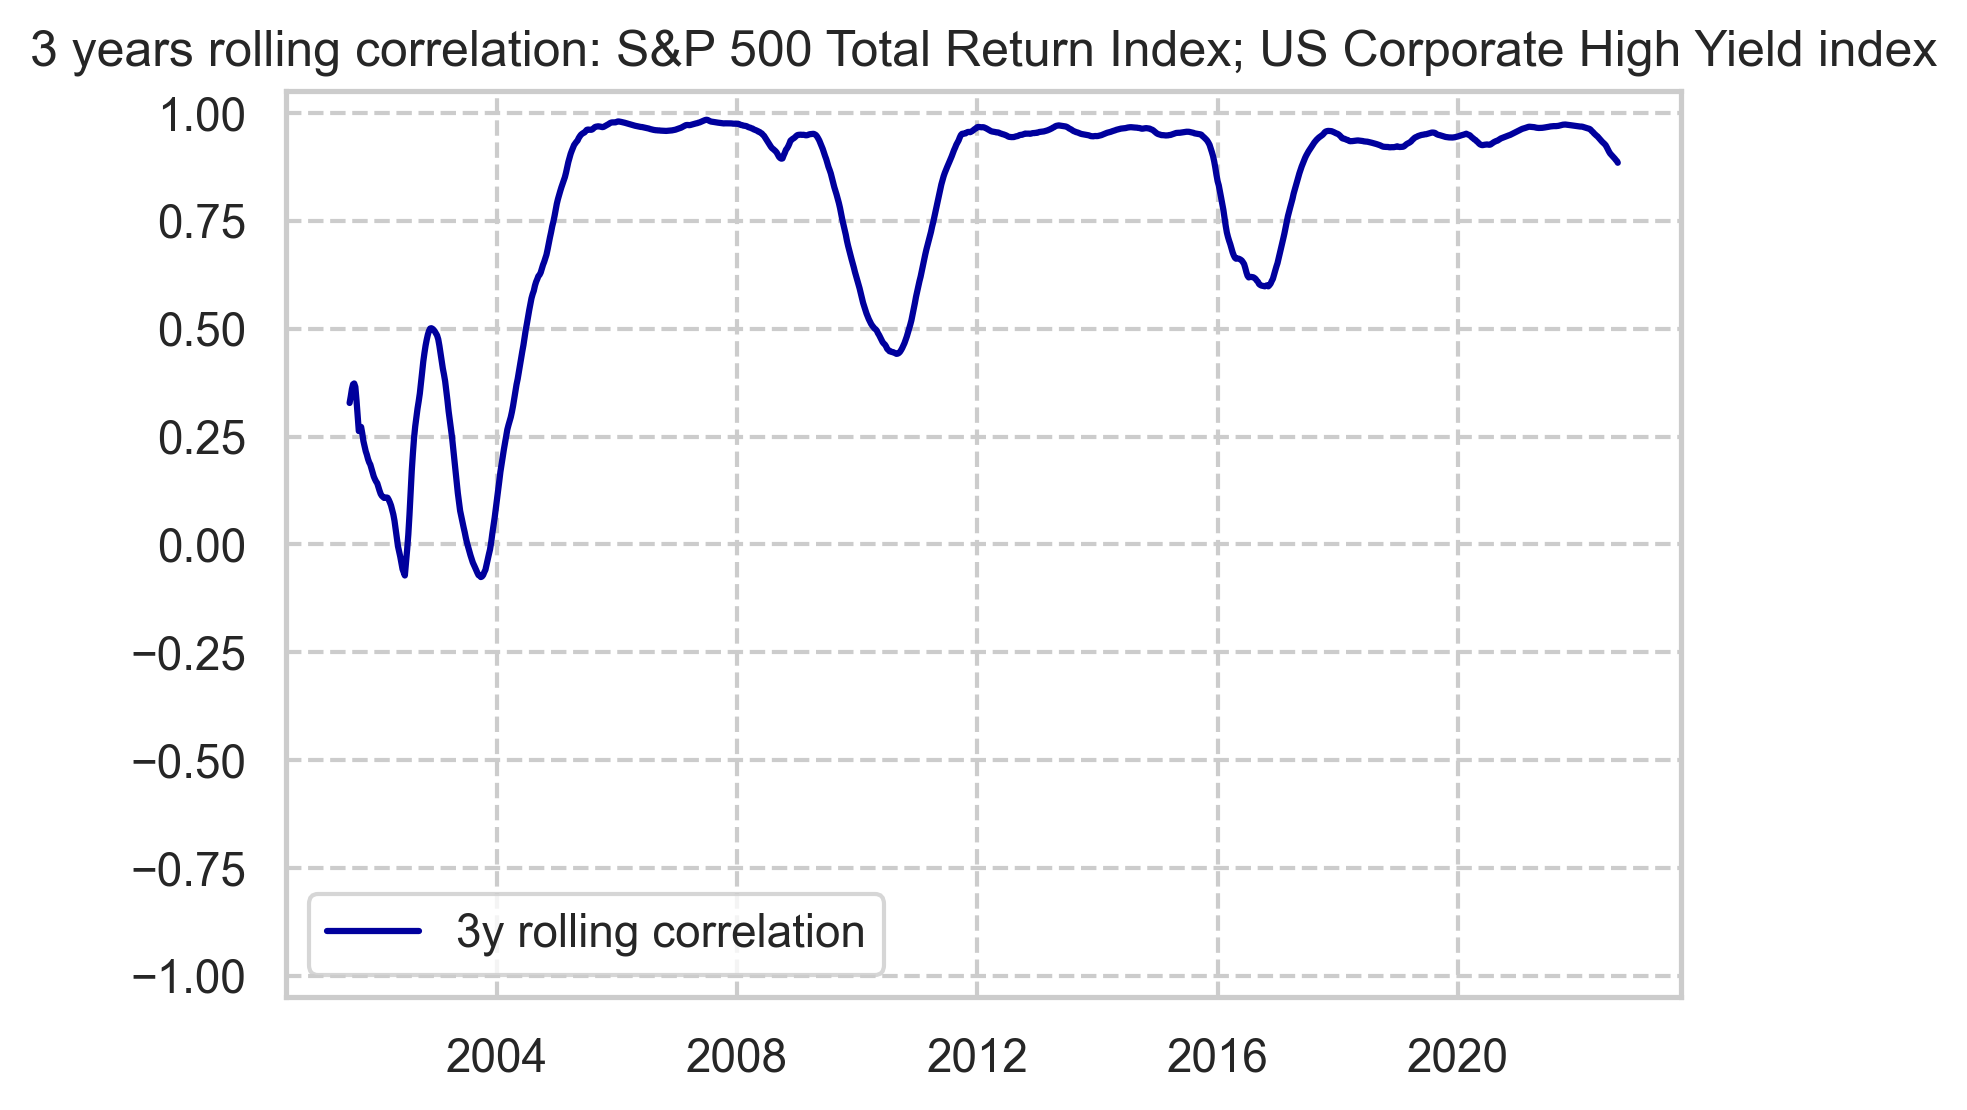

In [19]:
# US Correlations, rolling
weeks = 156
plot_utils.corr_plot_seaborn(sp_tr, us_corp_high, weeks)
# plot_utils.corr_plot_seaborn(sp_tr, us_corp_ig, weeks)
# plot_utils.corr_plot_seaborn(sp_tr, us3, weeks)
# plot_utils.corr_plot_seaborn(sp_tr, us5, weeks)
# plot_utils.corr_plot_seaborn(sp_tr, us10, weeks)

# plt.savefig('bsc_plots/3y_corr_sptr_uscorphigh.eps', dpi=600)

[Text(0.5, 1.0, '3 years rolling correlation: FTSE All-Share Index TR; 10Y UK GOVT BOND ')]

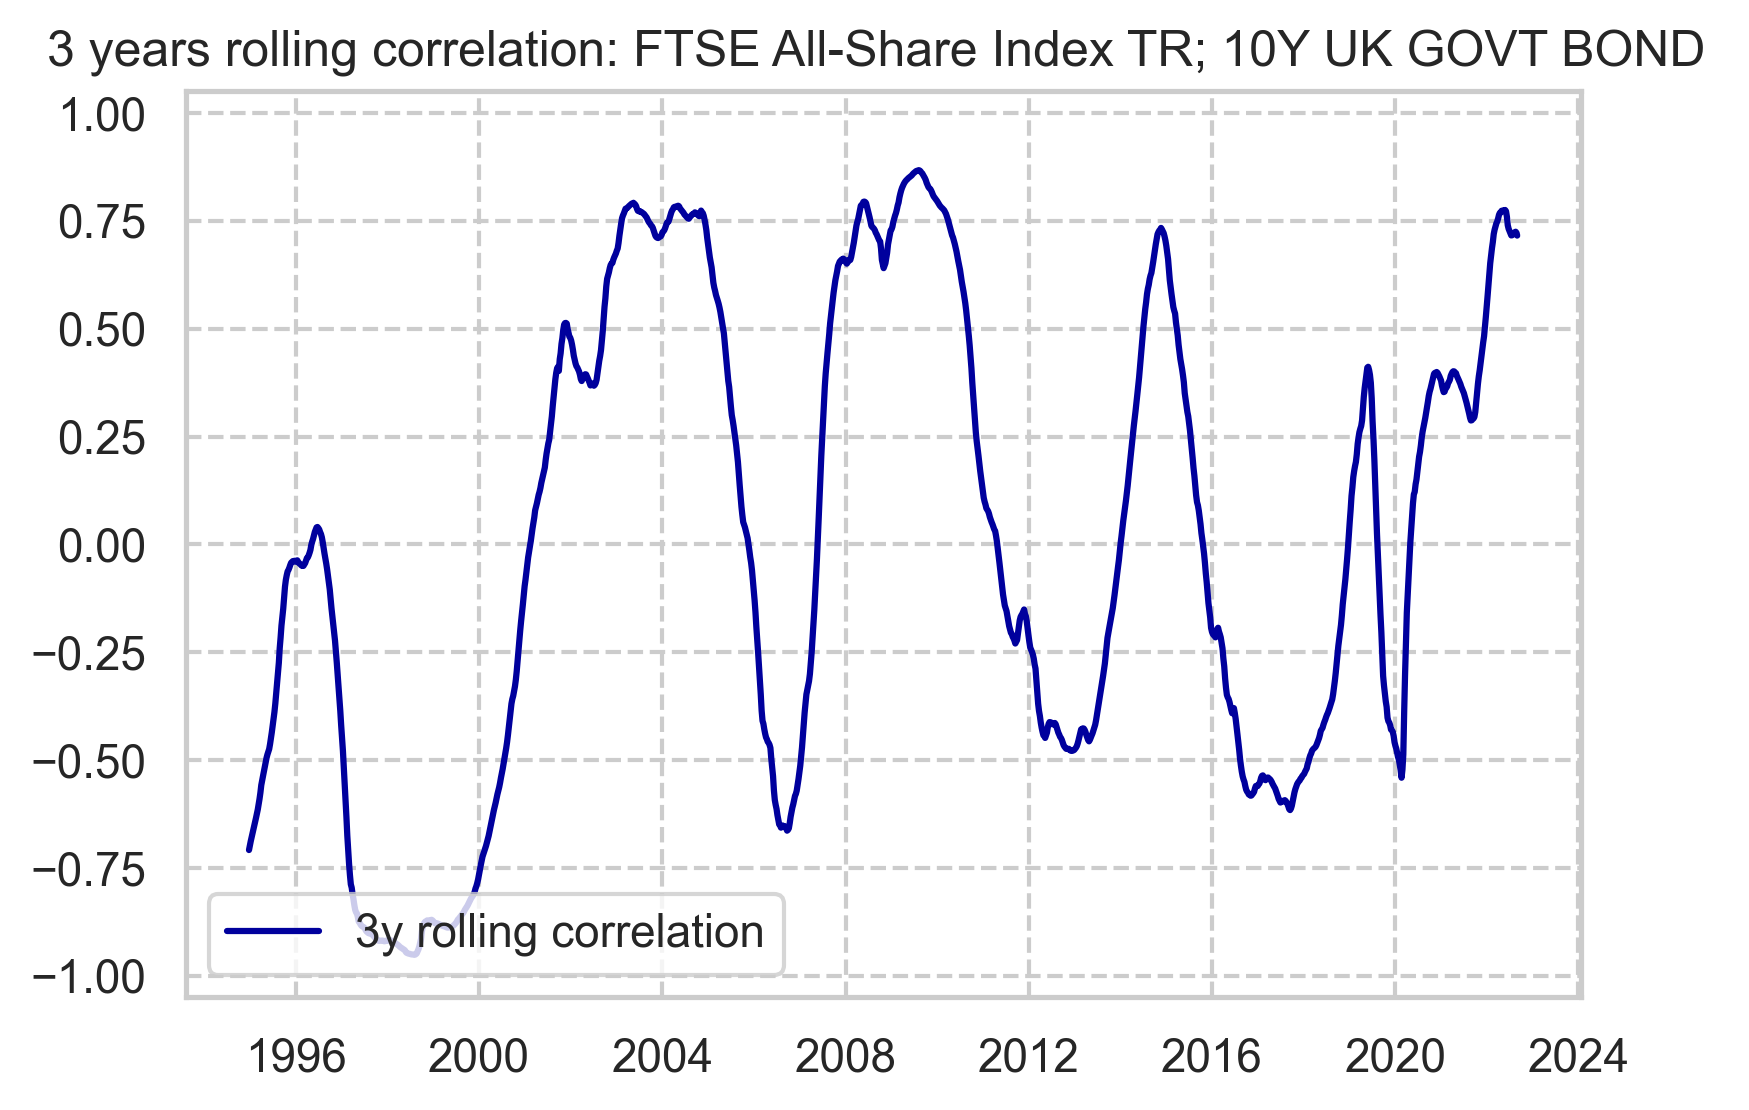

In [20]:
# UK Correlations, rolling
weeks = 156
# plot_utils.corr_plot_seaborn(ftse_tr, uk_corp_ig, weeks)
# plot_utils.corr_plot_seaborn(ftse_tr, uk3, weeks)
# plot_utils.corr_plot_seaborn(ftse_tr, uk5, weeks)
plot_utils.corr_plot_seaborn(ftse_tr, uk10, weeks)

# plt.savefig('bsc_plots/3y_corr_ftsetr_uk10.eps', dpi=600)

[Text(0.5, 1.0, '1 year rolling return: S&P 500 Total Return Index')]

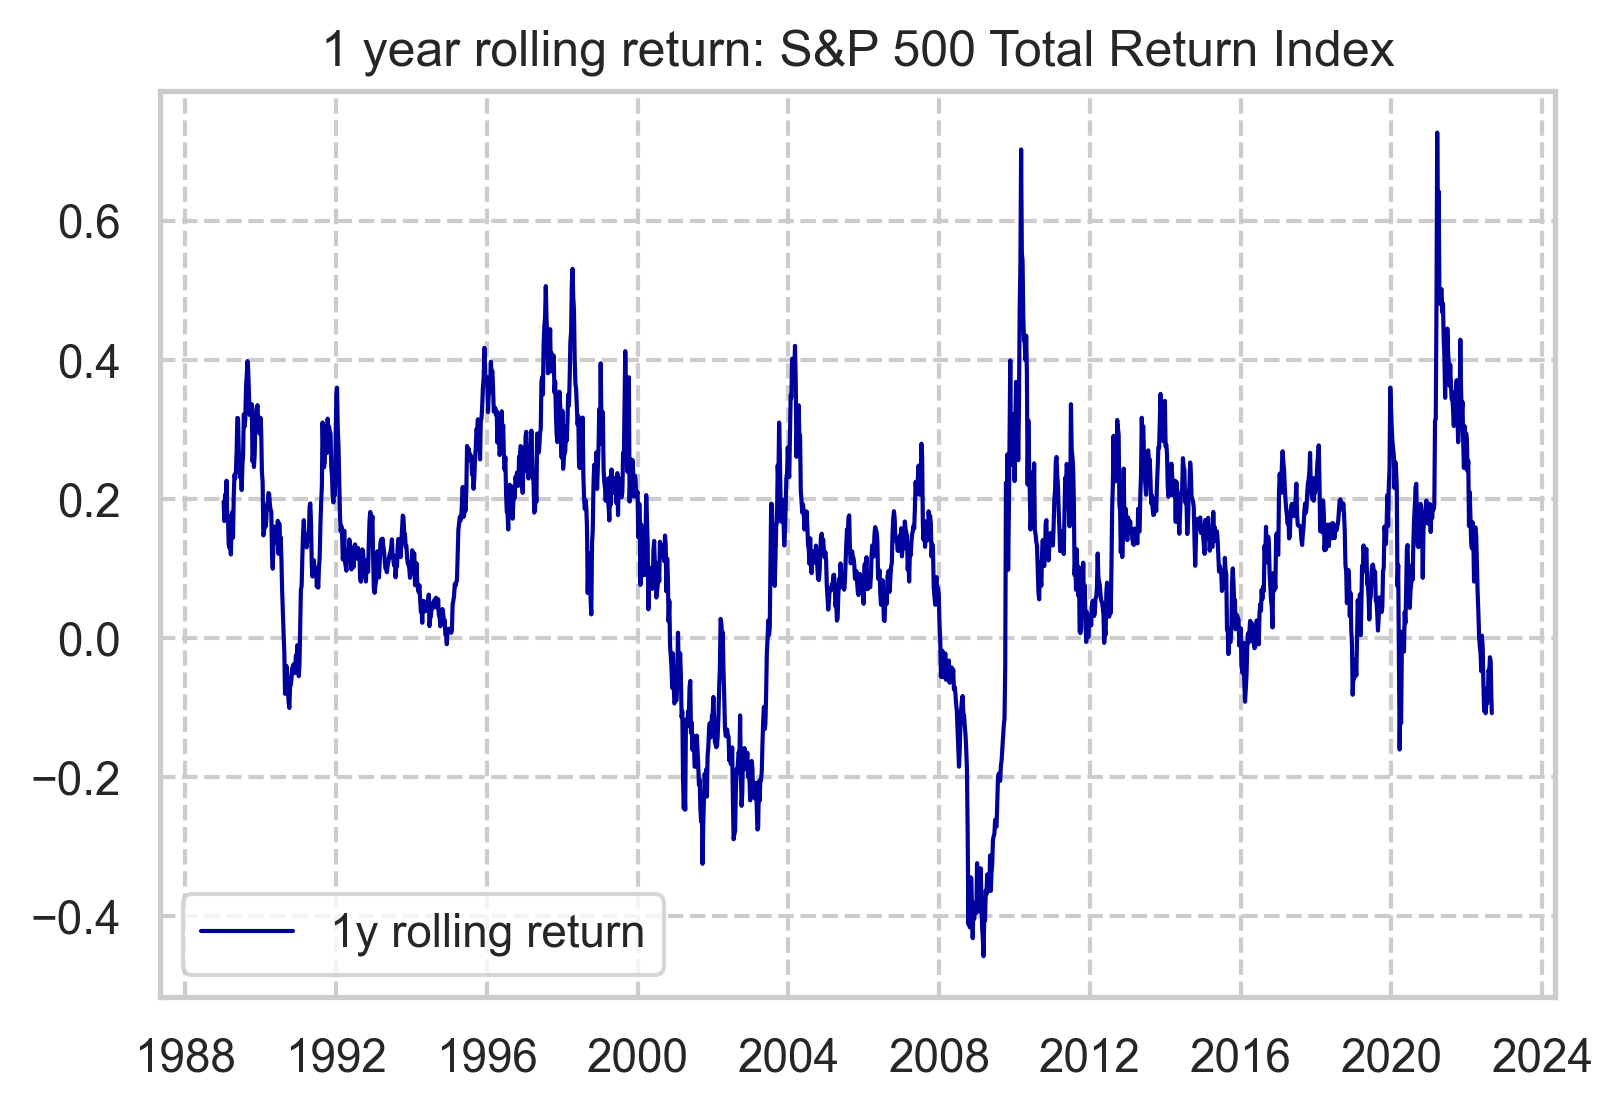

In [21]:
# US Returns, rolling
weeks = 52
# plot_utils.return_plot(us_corp_high, weeks)
# plot_utils.return_plot(us_corp_ig, weeks)
plot_utils.return_plot(sp_tr, weeks)

# plt.savefig('bsc_plots/1y_return_sptr.eps', dpi=600)

[Text(0.5, 1.0, '1 year rolling return: Bloomberg Sterling Corporate Bond Index')]

[Text(0.5, 1.0, '1 year rolling return: FTSE All-Share Index TR')]

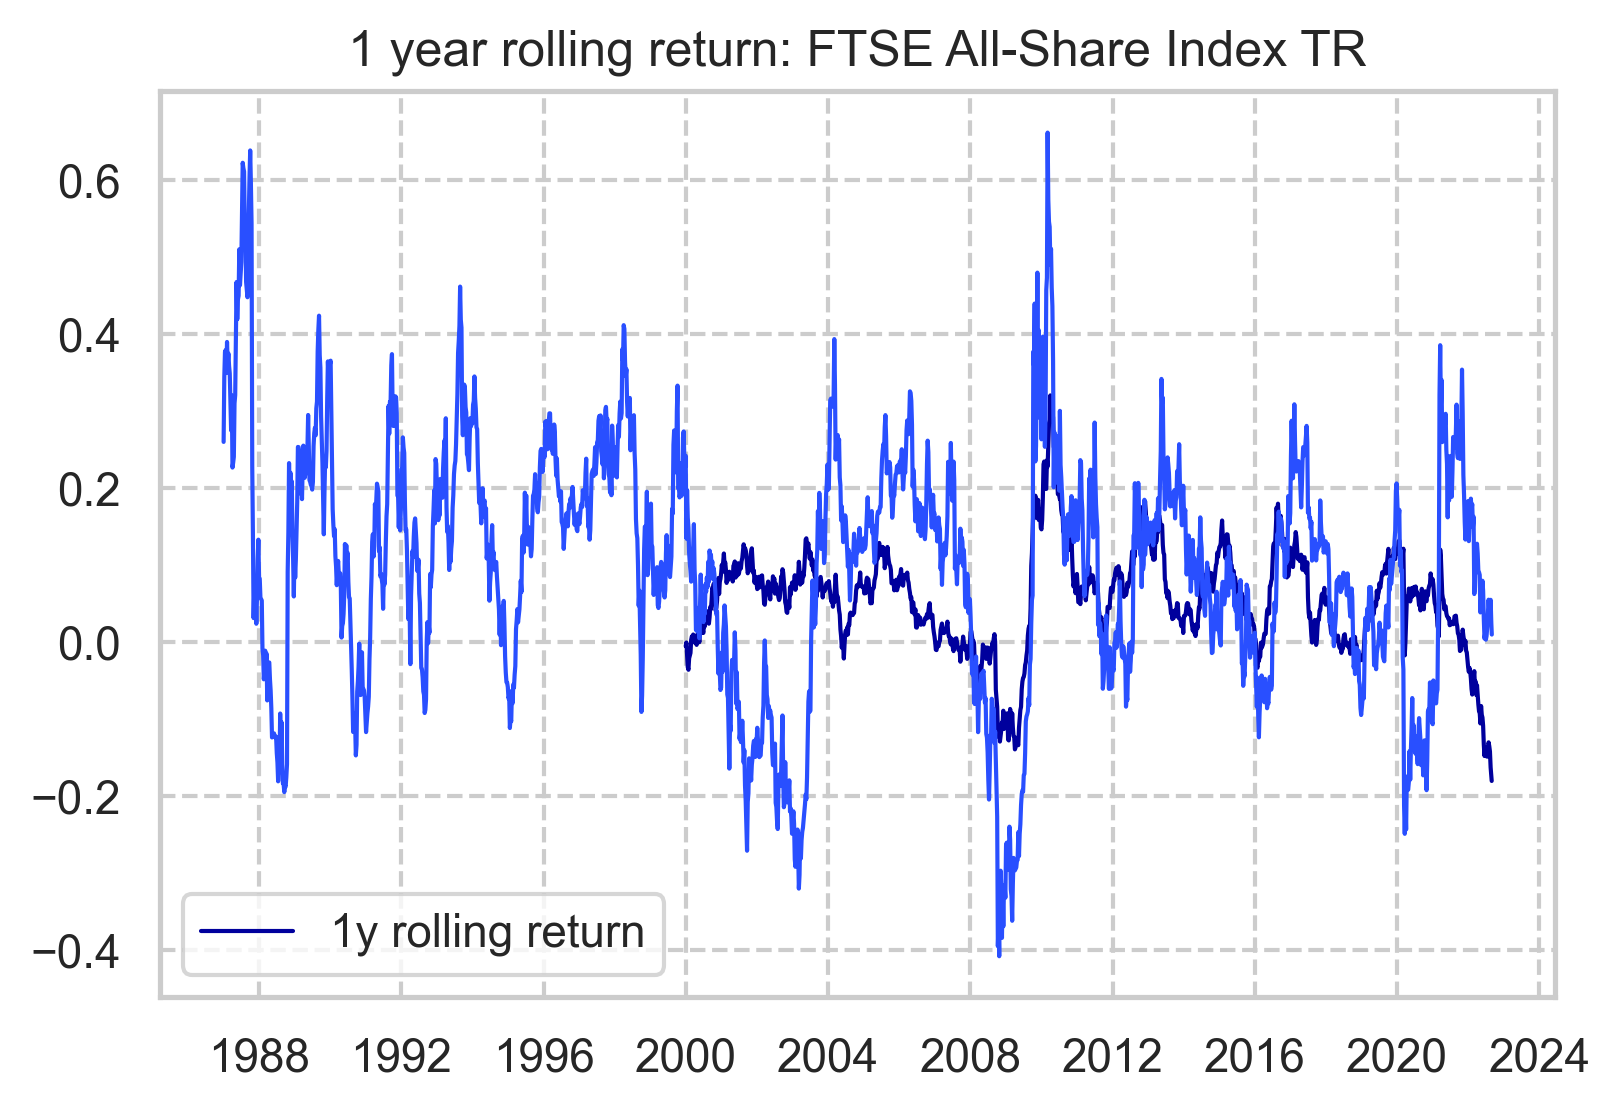

In [22]:
# UK Returns, rolling
weeks = 52
plot_utils.return_plot(uk_corp_ig, weeks)
plot_utils.return_plot(ftse_tr, weeks)

# plt.savefig('bsc_plots/1y_return_ukcorpig.eps', dpi=600)

[Text(0.5, 1.0, '1 year rolling return: BLOOMBERG GLOBAL CREDIT - GERMANY TR INDEX')]

[Text(0.5, 1.0, '1 year rolling return: DAX INDEX')]

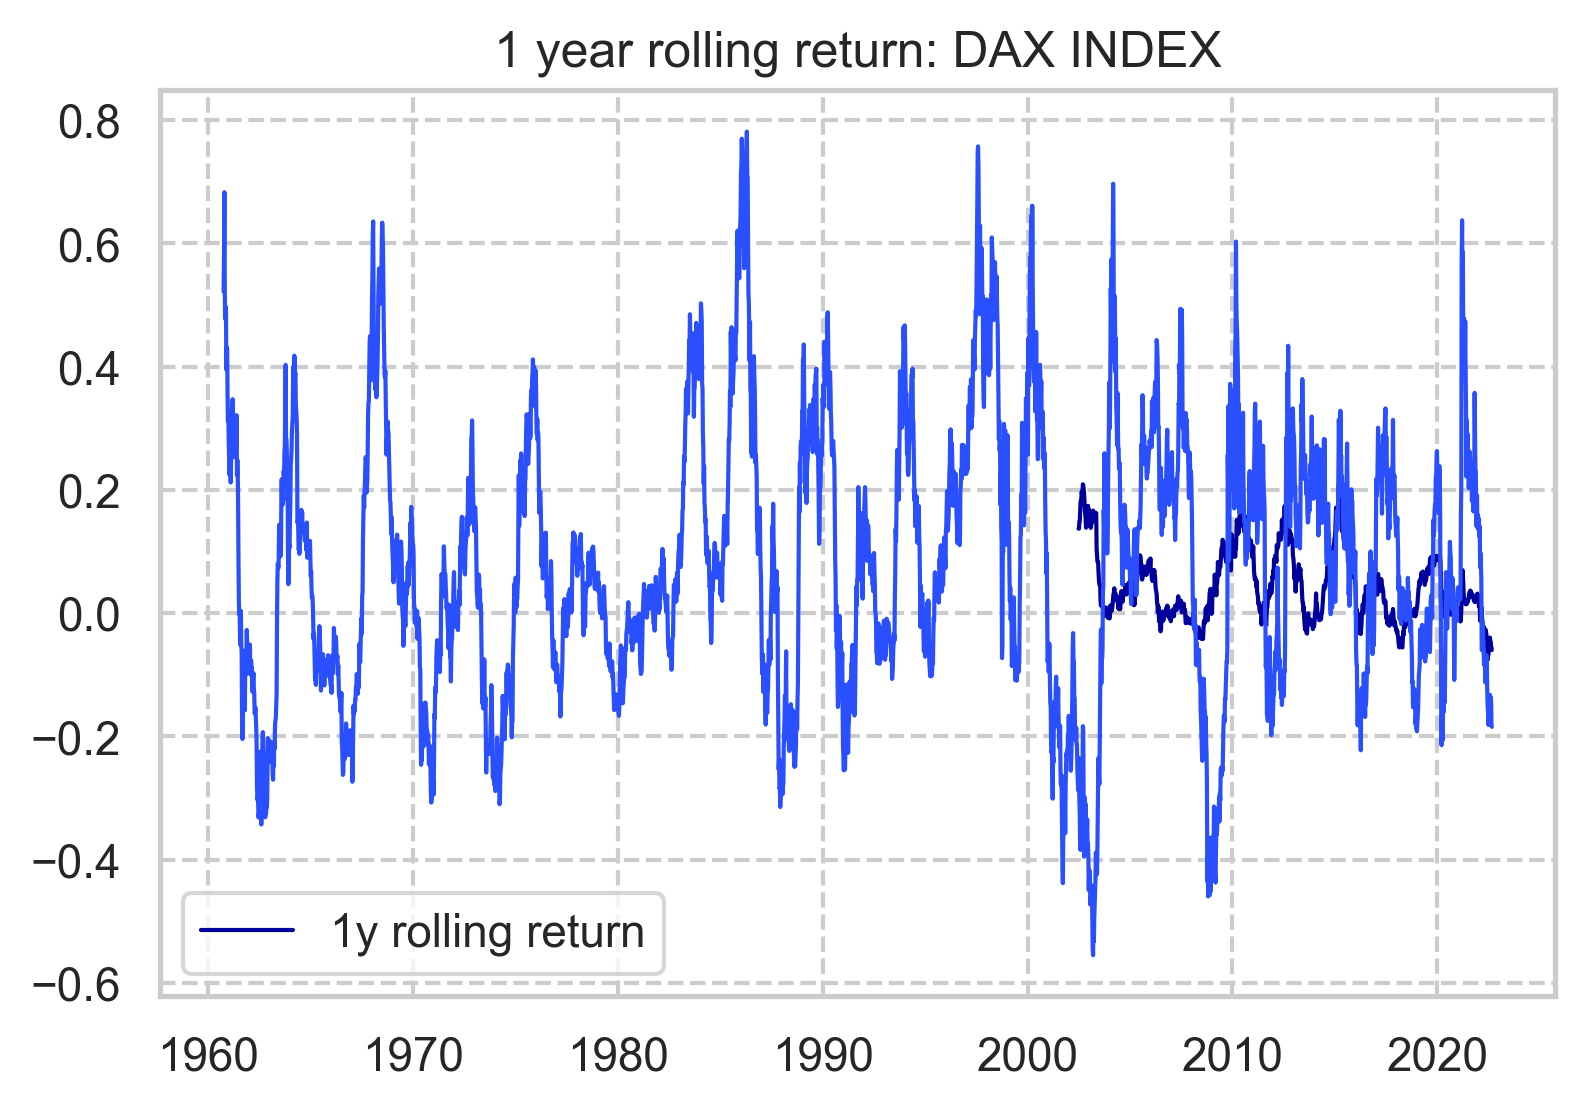

In [23]:
# German Returns, rolling
weeks = 52
plot_utils.return_plot(ger_tr, weeks)
plot_utils.return_plot(dax, weeks)

# plt.savefig('bsc_plots/1y_return_dax.eps', dpi=600)

(<Figure size 1800x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'3 year rolling standard deviation: S&P 500 Total Return Index'}>)

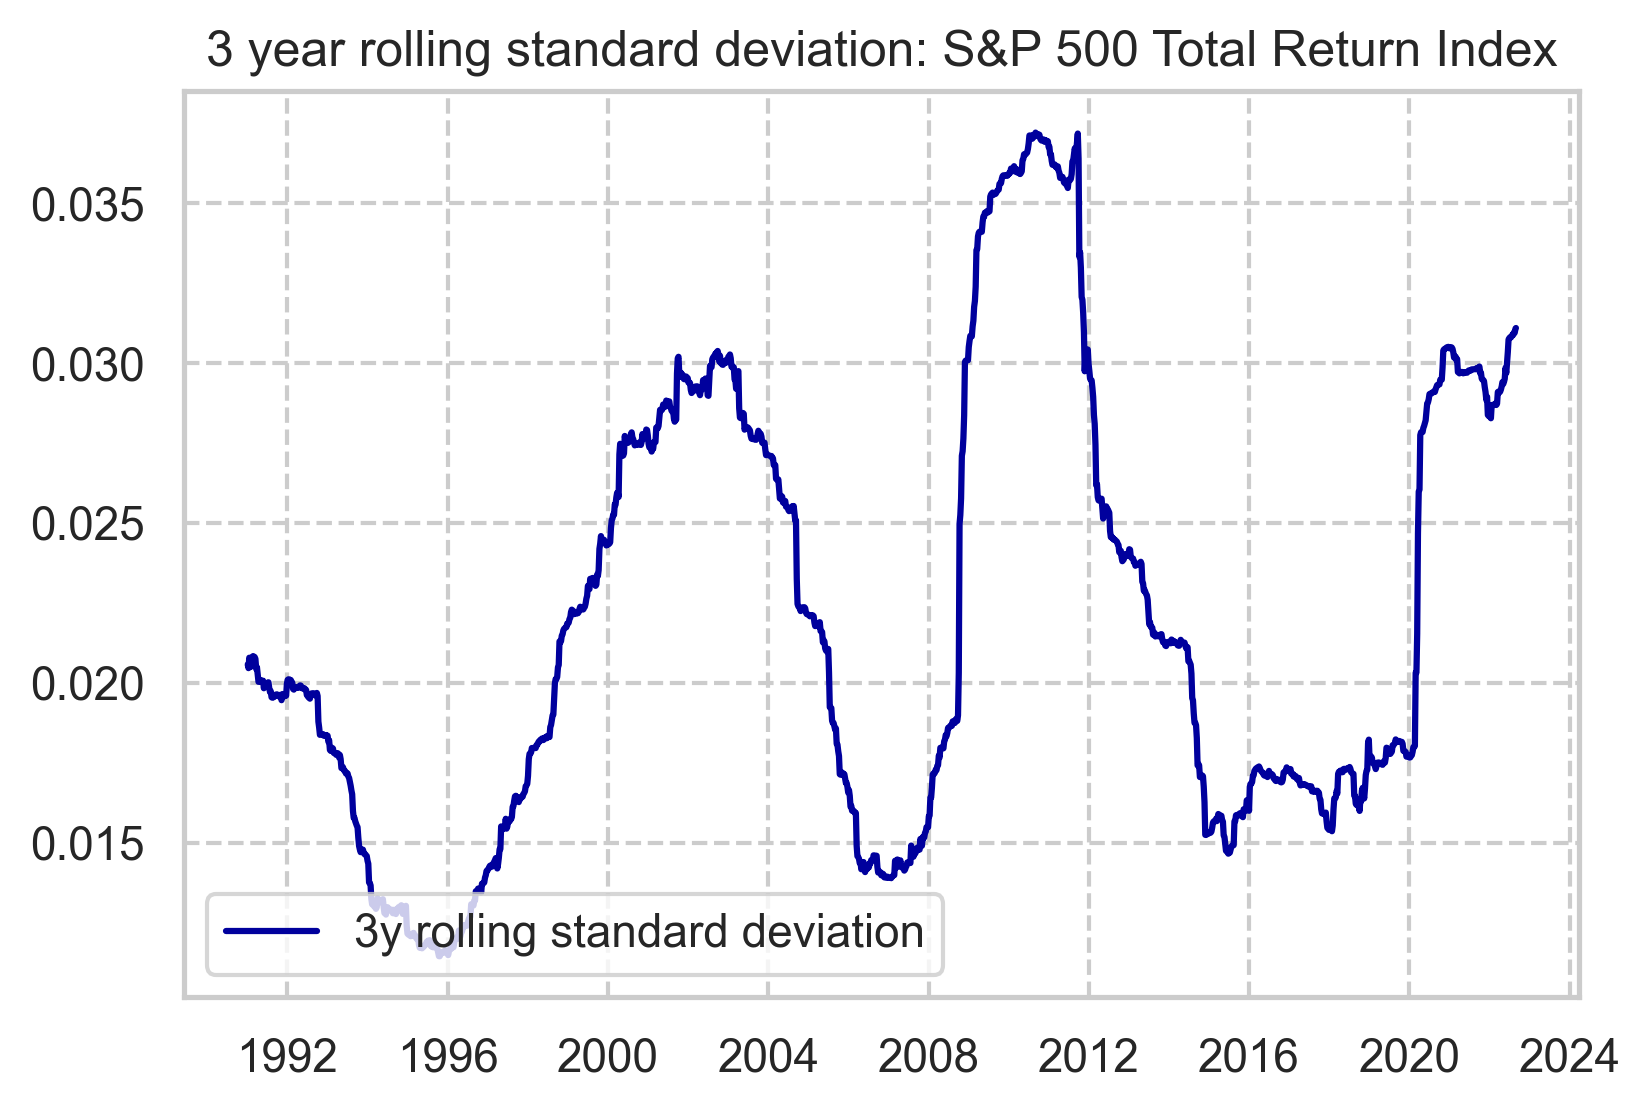

In [24]:
# US Sigma, rolling
weeks = 156
plot_utils.sigma_plot(sp_tr, weeks)
# plot_utils.sigma_plot(us_corp_ig, weeks)
# plot_utils.sigma_plot(us_corp_high, weeks)

# plt.savefig('bsc_plots/3y_sigma_sptr.eps', dpi=600)

(<Figure size 1800x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'3 year rolling standard deviation: FTSE All-Share Index TR'}>)

(<Figure size 1800x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'3 year rolling standard deviation: Bloomberg Sterling Corporate Bond Index'}>)

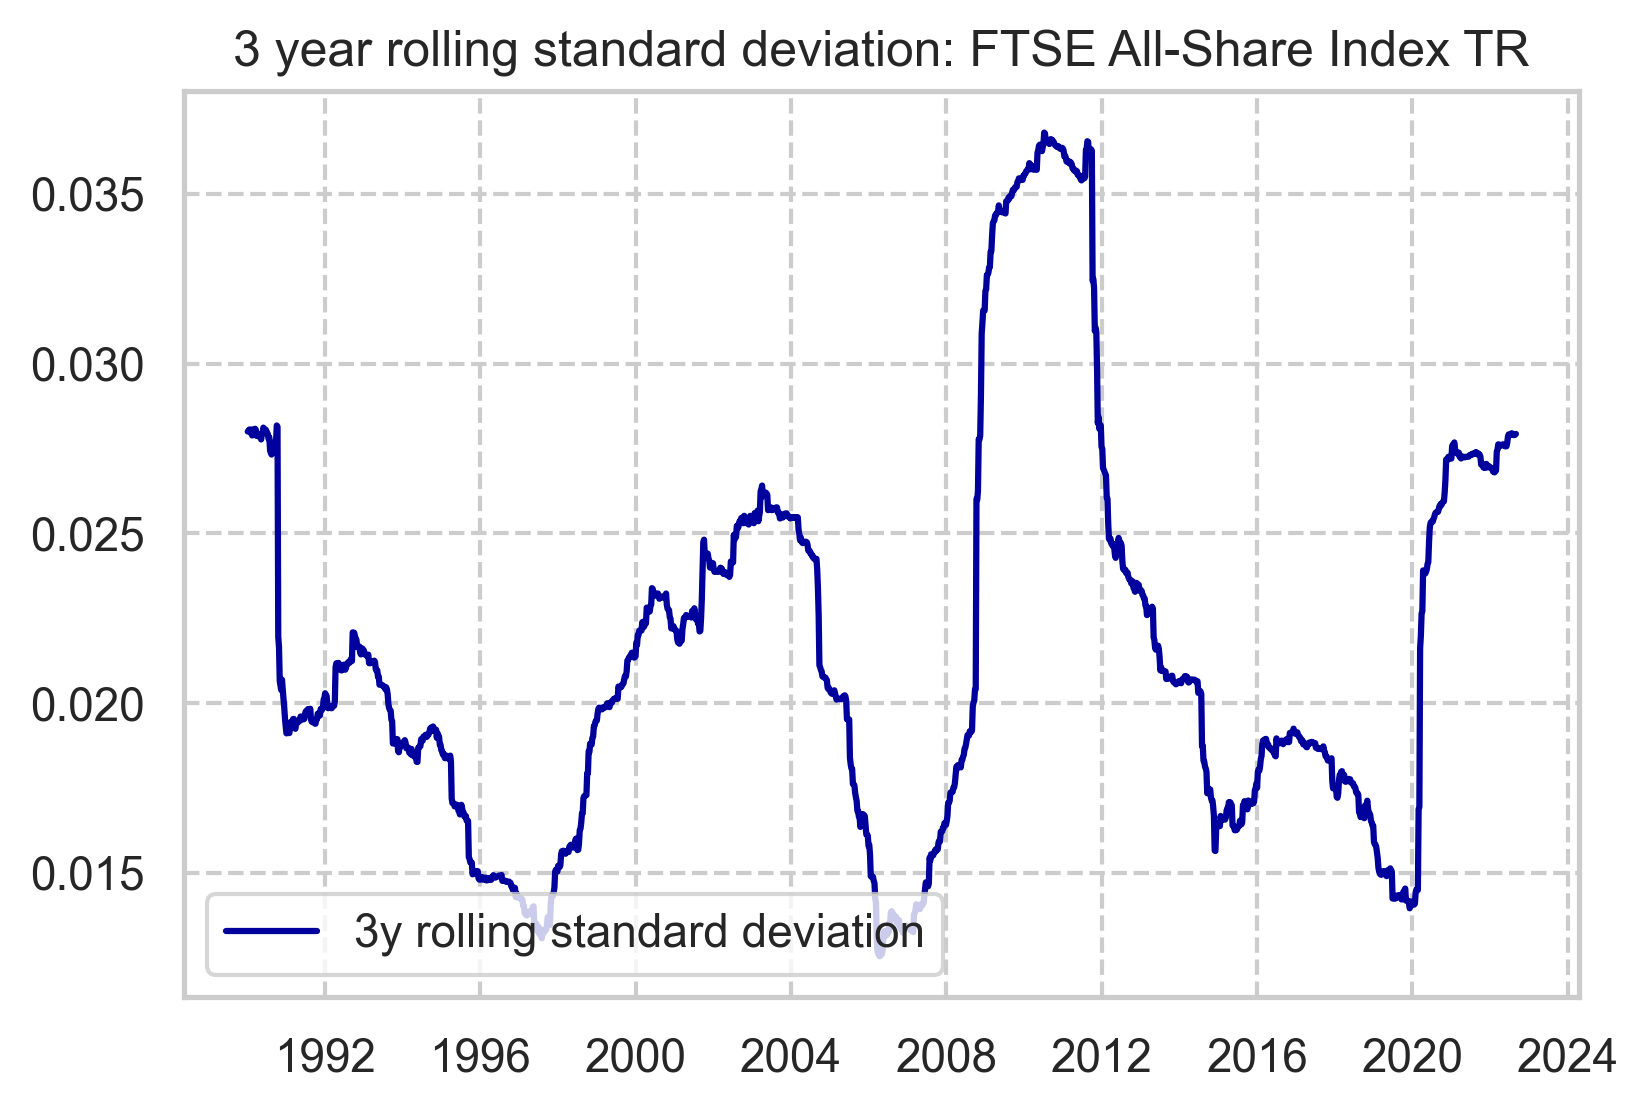

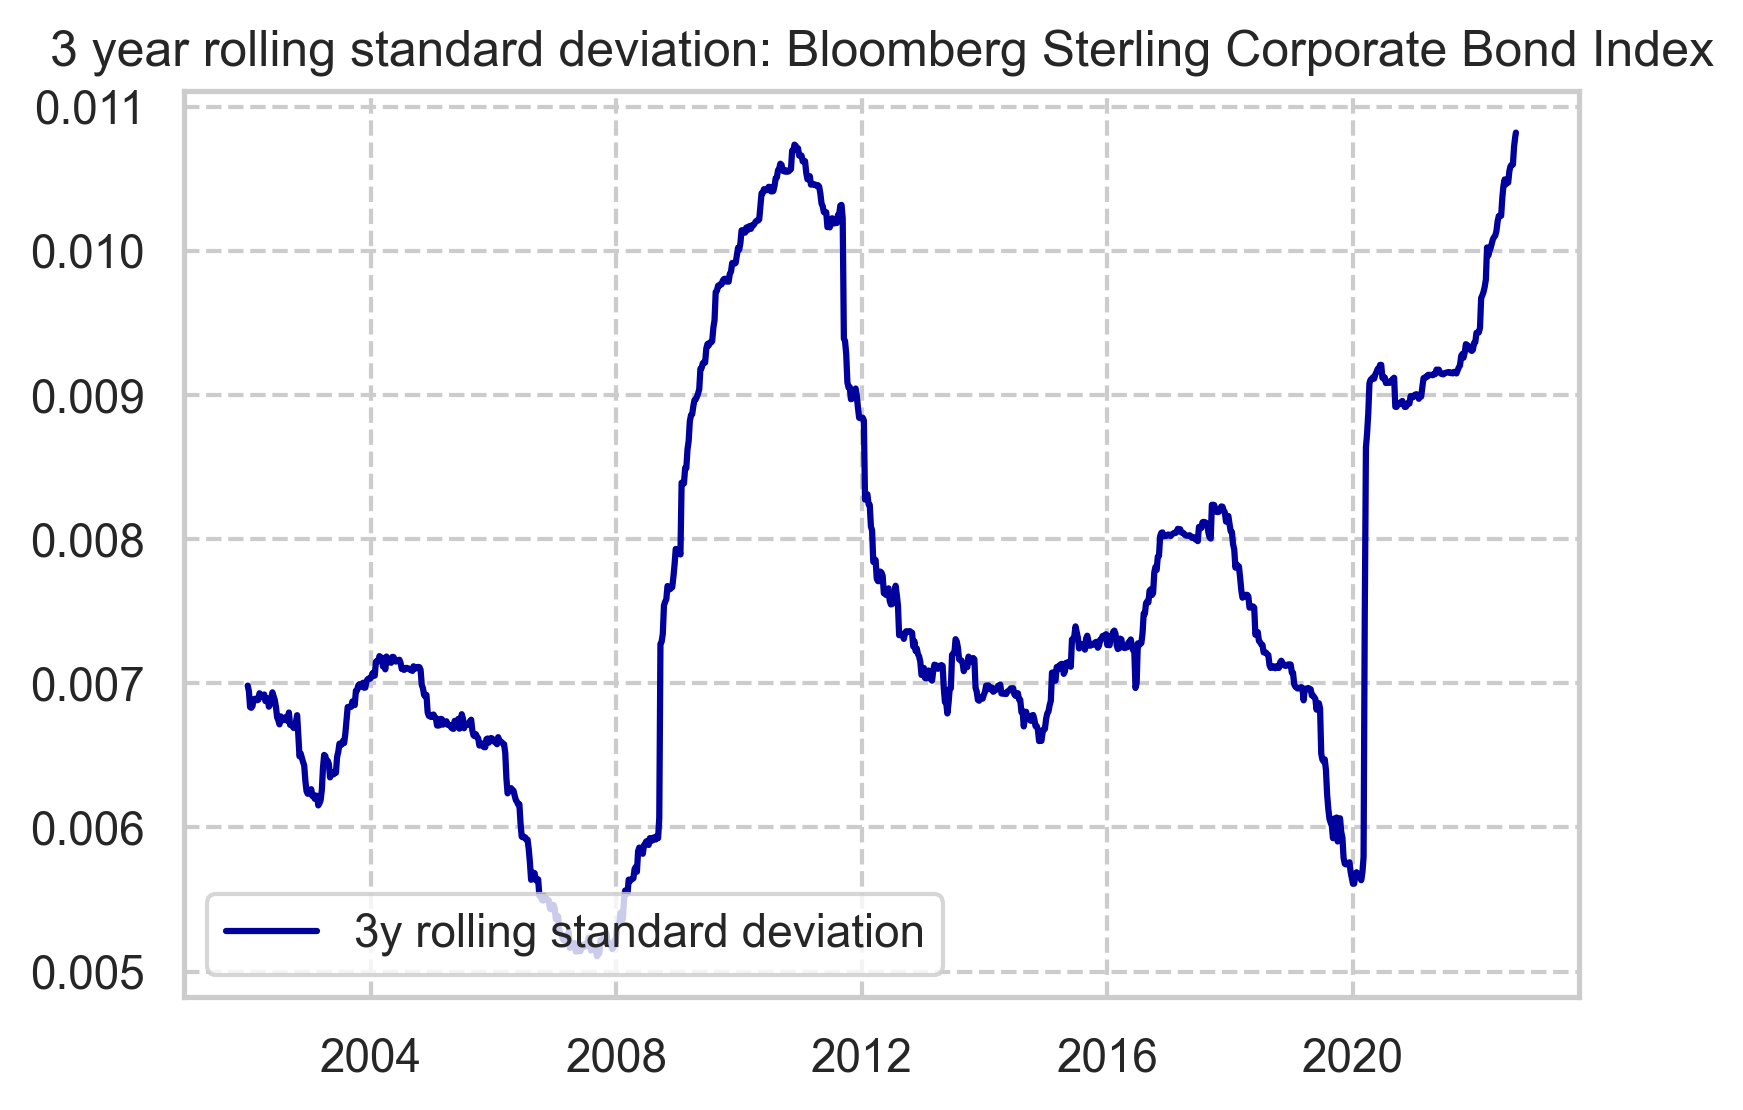

In [25]:
# UK Sigma, rolling
weeks = 156
plot_utils.sigma_plot(ftse_tr, weeks)
plot_utils.sigma_plot(uk_corp_ig, weeks)

# plt.savefig('bsc_plots/3y_sigma_ftsetr.eps', dpi=600)

(<Figure size 1800x1200 with 1 Axes>,
 <AxesSubplot:title={'center':'3 year rolling standard deviation: DAX INDEX'}>)

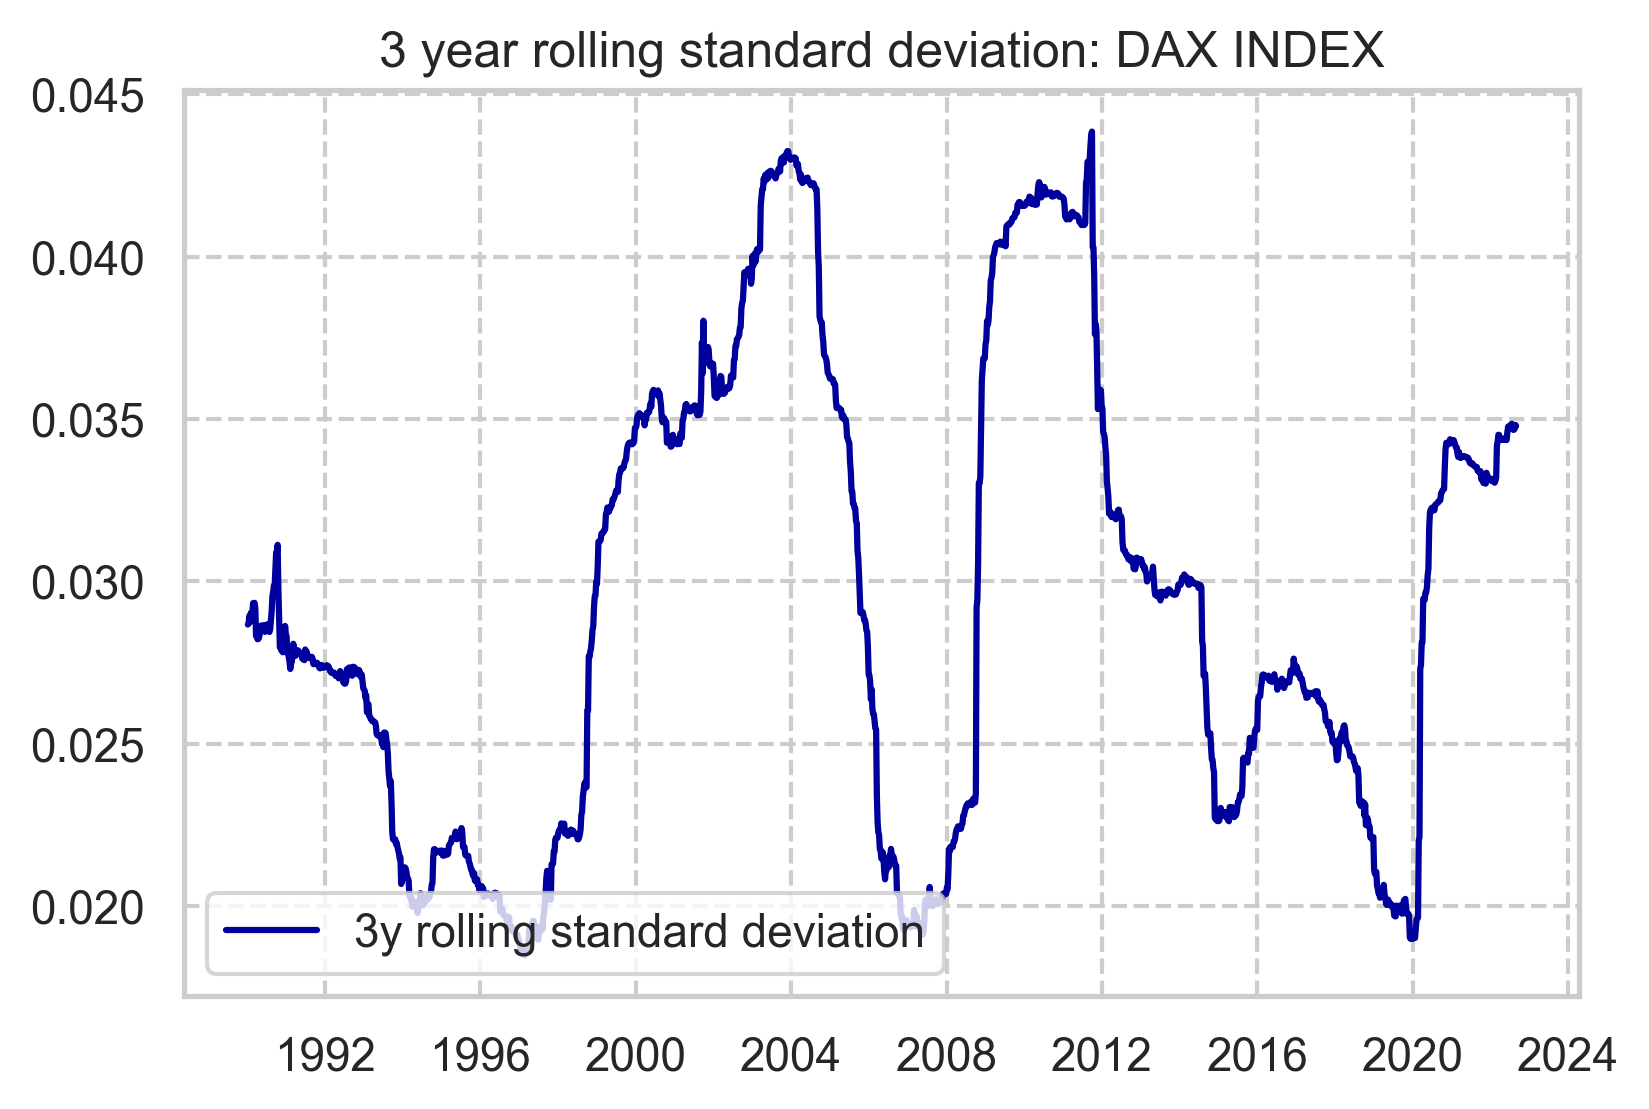

In [26]:
# German Sigma, rolling
weeks = 156
# fig, axs = plot_utils.sigma_plot(dax, weeks)
plot_utils.sigma_plot(dax, weeks)
# sp.sigma_plot(ger_tr,weeks)

# plt.savefig('bsc_plots/3y_sigma_dax.eps', dpi=600)

<AxesSubplot:xlabel='date', ylabel='corr'>

Text(0, 0.5, '')

Text(0.5, 0, '')

(-1.05, 1.05)

<AxesSubplot:xlabel='date', ylabel='std'>

Text(0.5, 1.0, '3 years rolling correlation: DAX INDEX; GER GOVT BOND 3Y\n3 year rolling standard deviation: DAX INDEX')

Text(0, 0.5, '')

Text(0.5, 0, '')

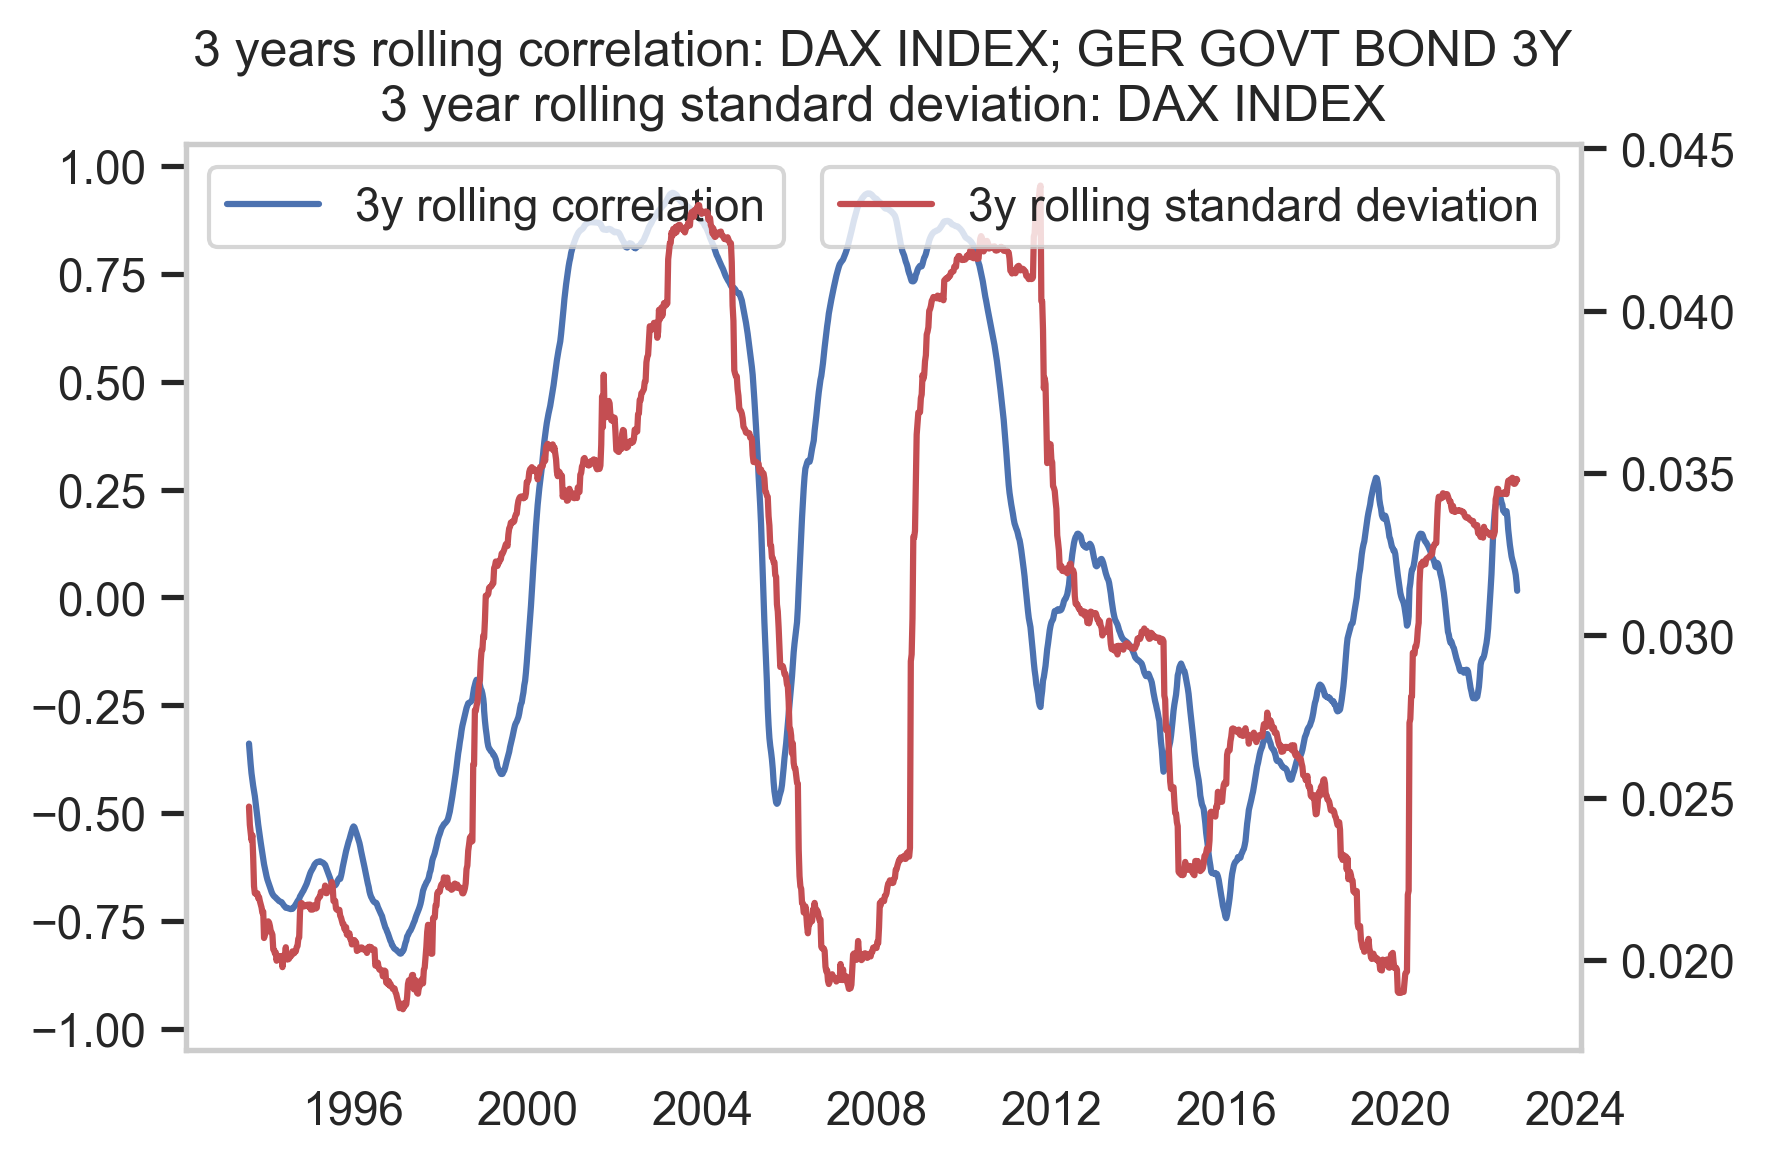

In [28]:
weeks = 156

# set 1st input series and corr length
series1 = dax
series2 = ger3
corr_length = 156

# set theme and style
sns.set_theme()
sns.set_style("whitegrid", {'grid.linestyle': ''})

# find which series is the shortest and set start date to that of the shortest series
if len(series1) > len(series2):
    tail_length = len(series2)
    start_date = series2.iloc[0]['date'] + \
        pd.to_timedelta(corr_length, unit='W')
else:
    tail_length = len(series1)
    start_date = series1.iloc[0]['date'] + \
        pd.to_timedelta(corr_length, unit='W')

# set tail length as the shortest series
series1 = series1.tail(tail_length)
series2 = series2.tail(tail_length)

series1.reset_index(inplace=True, drop=True)
series2.reset_index(inplace=True, drop=True)

# make it work for both yield and last_price columns
col_name1 = 'last_price'
col_name2 = 'last_price'
col_name = 'last_price'
if 'yield' in series1.columns:
    col_name1 = 'yield'
    col_name = 0
if 'yield' in series2.columns:
    col_name2 = 'yield'
    col_name = 0

# calc the rollling corr
corr = series1[col_name1].rolling(corr_length).corr(series2[col_name2])

# insert into dataframe, add dates and rename calucalted correlation column to corr
corr = pd.DataFrame(corr)
corr['date'] = series1['date']
corr['corr'] = corr[col_name]
corr = corr.drop(col_name, axis=1)

# cutoff to startdate
corr = corr[corr['date'] > start_date]

# auto-create 1st title
title1 = str(corr_length/52)[0:1] + ' years rolling correlation:' + \
    ' ' + series1.iloc[1, 0] + '; ' + series2.iloc[1, 0]

# create canvas
fig, axs = plt.subplots(1, 1)

# plot it
sns.lineplot(corr, y='corr', x='date', linewidth=1.5, legend=False, ax=axs)

# add legend, remove labels and adjust y-axis
plt.legend(loc='upper left', labels=['3y rolling correlation'])
plt.ylabel("")
plt.xlabel("")
plt.ylim(-1.05, 1.05)

# add second y-axis
ax2 = plt.twinx()



# ----------------------
# set 2nd series
series1 = dax

# calculate return
returns_series1 = series1['last_price'].pct_change(periods=1)

# insert into dataframe
returns_series1 = pd.DataFrame(returns_series1)

# calculate rolling returns
std_returns_series1 = returns_series1.rolling(weeks).std()

# add dates and rename column to std
std_returns_series1['date'] = series1['date']
std_returns_series1 = std_returns_series1.rename(columns={'last_price': 'std'})

# cutoff to match shortest of the 1st input
std_returns_series1 = std_returns_series1[std_returns_series1['date'] > start_date]

# plot it on second axis
sns.lineplot(std_returns_series1, x='date', y='std',
             color='r', legend=False, linewidth=1.5, ax=ax2)

# auto-create 2nd title
title2 = str(corr_length/52)[0:1] + ' year rolling standard deviation: ' + str(series1.iloc[0]['name'])

# concatinate titles and attah it to axis
title_final = title1 + '\n' + title2
axs.set_title(title_final)

# add legend, remove labels and adjust y-axis
plt.legend(loc='upper right', labels=['3y rolling standard deviation'])
plt.ylabel("")
plt.xlabel("")

# plt.savefig('bsc_plots/3y_corr_dax_ger3_sigma_dax.eps', dpi=600)

<AxesSubplot:xlabel='yield', ylabel='Probability'>

,name,bloomberg,date,yield
9668,US Generic Govt 10y index,USGG10YR Index,1962-01-05,4.0220
9669,US Generic Govt 10y index,USGG10YR Index,1962-01-12,4.0820
9670,US Generic Govt 10y index,USGG10YR Index,1962-01-19,4.1120
9671,US Generic Govt 10y index,USGG10YR Index,1962-01-26,4.1120
9672,US Generic Govt 10y index,USGG10YR Index,1962-02-02,4.0820
...,...,...,...,...
12829,US Generic Govt 10y index,USGG10YR Index,2022-08-05,2.8268
12830,US Generic Govt 10y index,USGG10YR Index,2022-08-12,2.8312
12831,US Generic Govt 10y index,USGG10YR Index,2022-08-19,2.9721
12832,US Generic Govt 10y index,USGG10YR Index,2022-08-26,3.0409


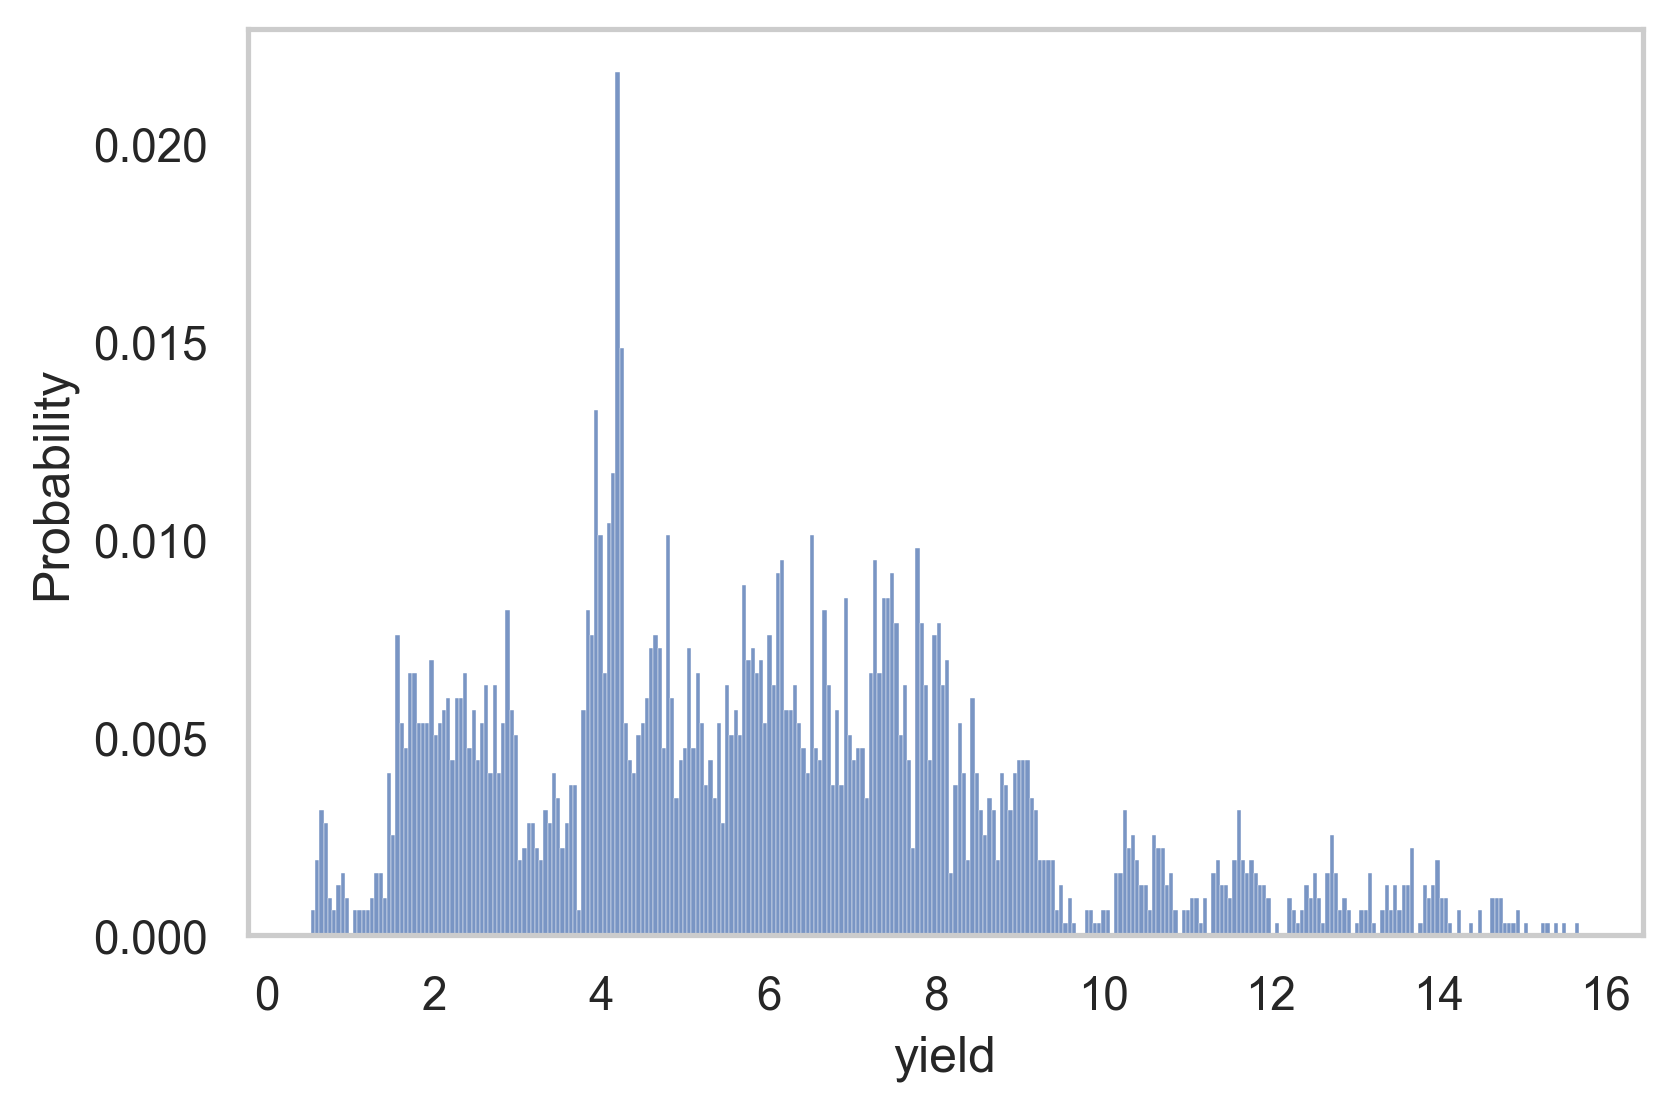

In [29]:
sns.histplot(us10, x='yield', stat='probability', bins=300)
us10

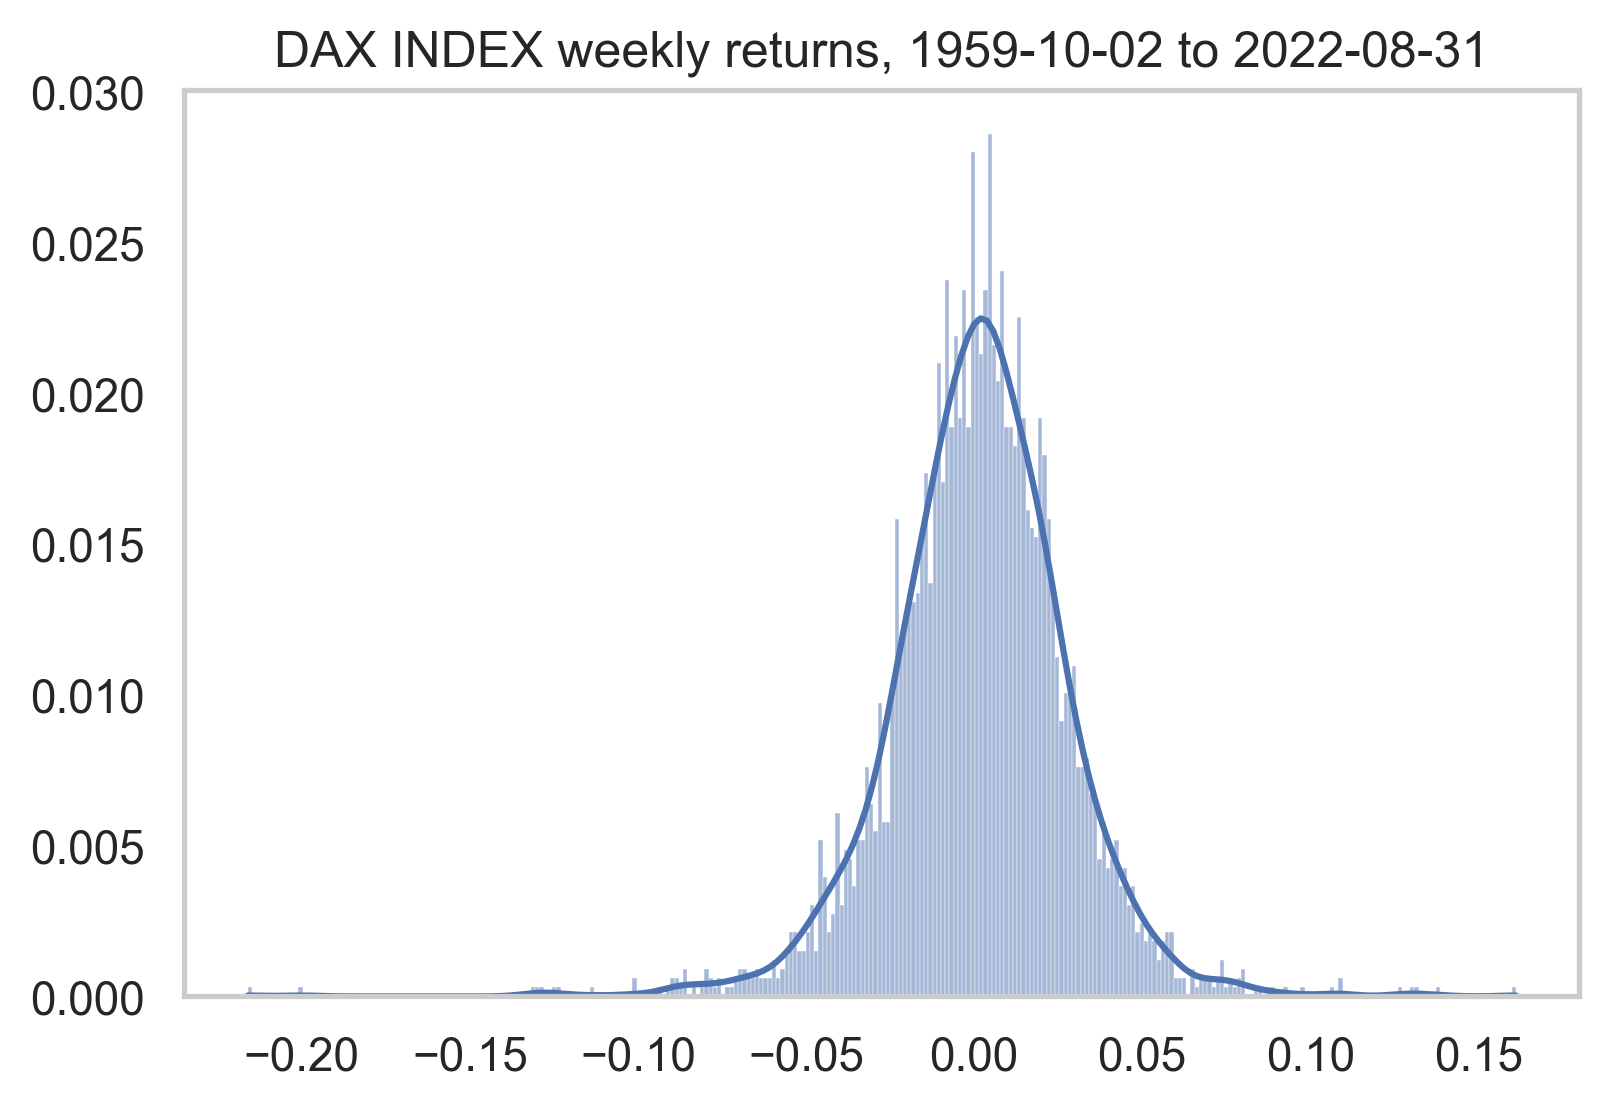

In [31]:
# German price returns histogram
fig = plot_utils.histogram_plot(dax)
# fig = hp.histogram_plot(ger_tr)

# plt.savefig('bsc_plots/hist_dax.eps', dpi=600)
# Todo: compare to normal dist, derive kurtosis etc

Text(0, 0.5, '')

Text(0.5, 0, '')

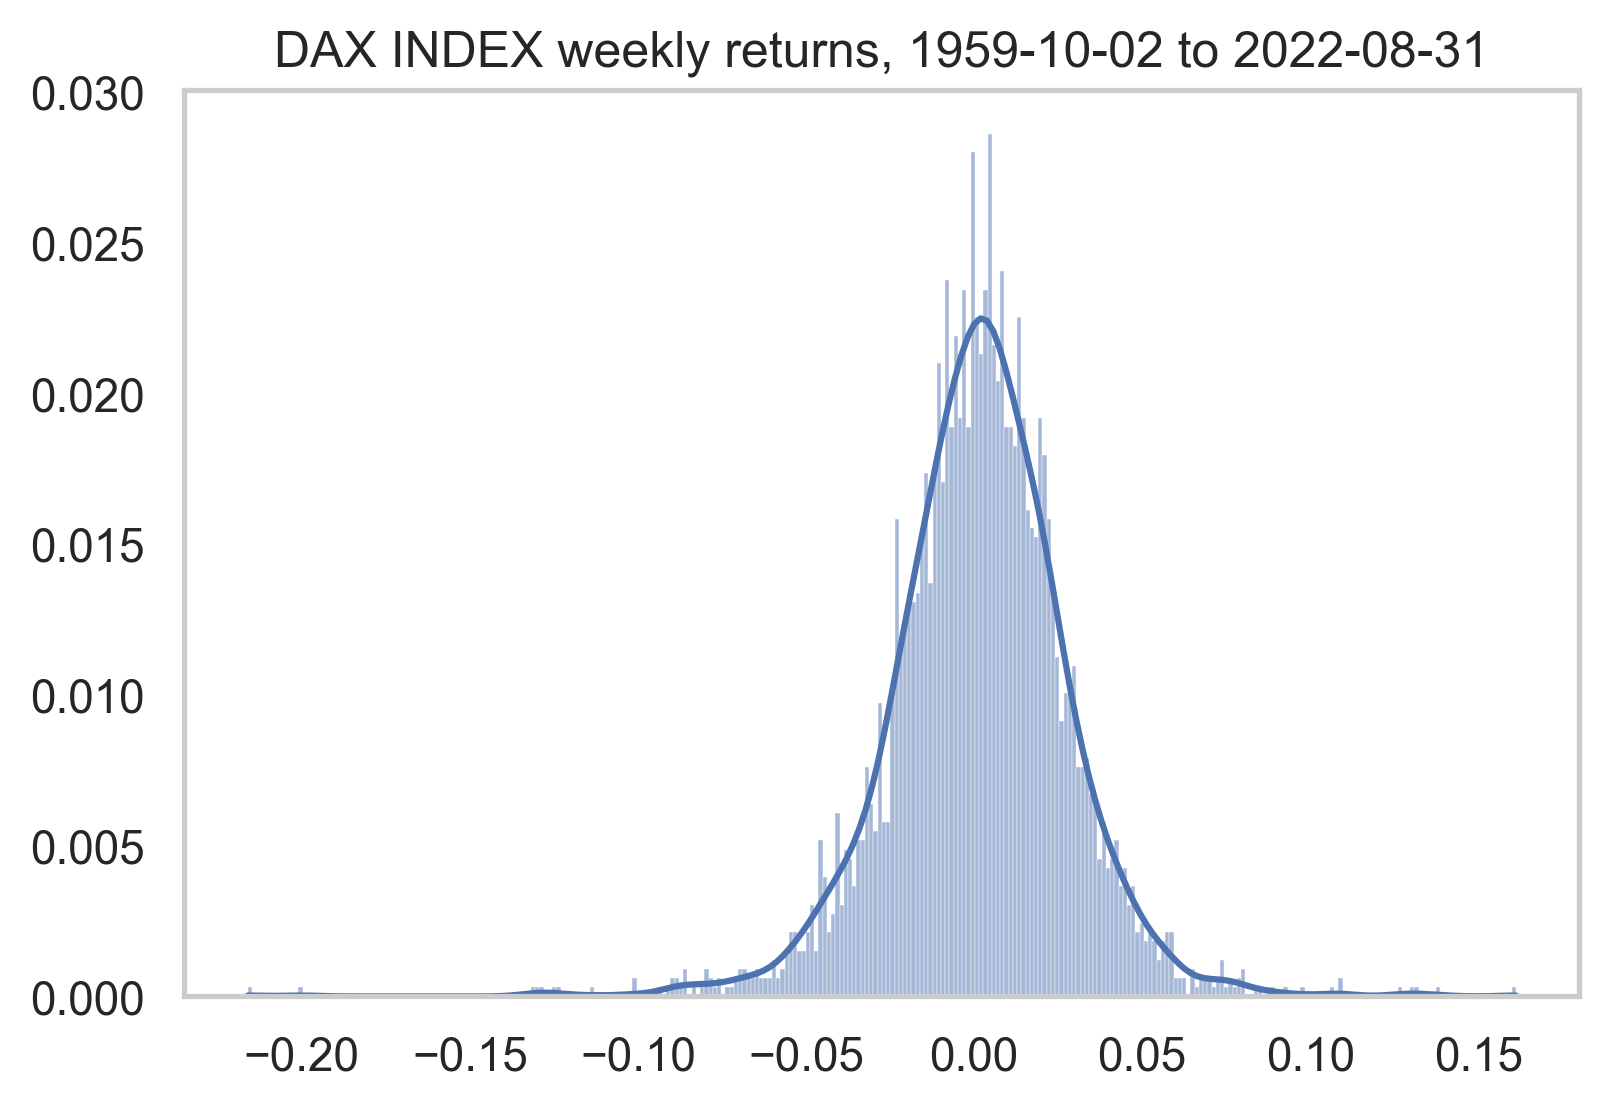

In [32]:
series1 = dax
returns = series1['last_price'].pct_change(periods=1)
returns = pd.DataFrame(returns)
returns['date'] = series1['date']
# returns = returns[returns['date'] > '20020629']

returns = returns.rename(columns={'last_price': 'return'})
# returns['log(return)'] = np.log(returns['return'])

title1 = str(series1.iloc[0]['name']) + ' weekly returns, ' + str(series1.iloc[0]['date'])[0:10] + ' to ' + str(series1.iloc[len(series1)-1]['date'])[0:10]
fig = sns.histplot(returns, x="return", kde=True,  stat='probability', bins=300).set(title=title1)
plt.ylabel("")
plt.xlabel("")


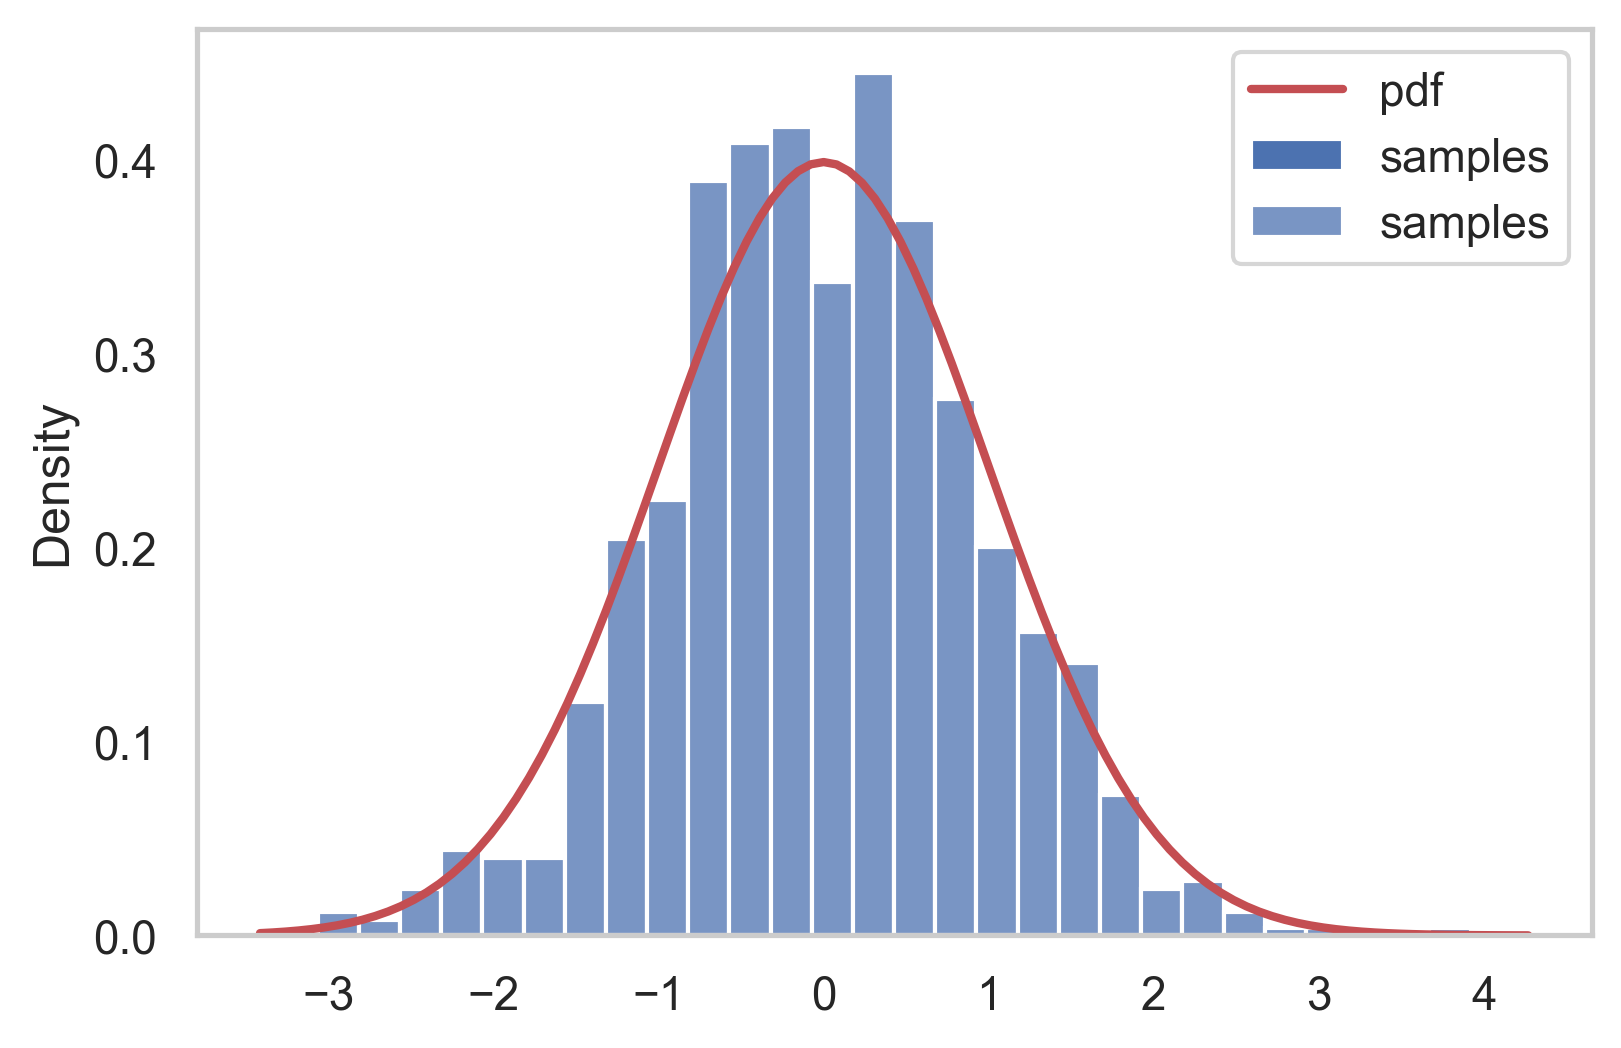

In [31]:
np.random.seed(365)
x = np.random.standard_normal(1000)    

ax = sns.histplot(x, kde=False, stat='density', label='samples')

# calculate the pdf
x0, x1 = ax.get_xlim()  # extract the endpoints for the x-axis
x_pdf = np.linspace(x0, x1, 100)
y_pdf = sci.stats.norm.pdf(x_pdf)

ax.plot(x_pdf, y_pdf, 'r', lw=2, label='pdf')                                                   
ax.legend()

True

(array([0.0028402 , 0.01704121, 0.09372664, 0.19313369, 0.36496587,
        0.38910759, 0.23999701, 0.08662614, 0.02556181, 0.0071005 ]),
 array([-3.54778531, -2.84360988, -2.13943446, -1.43525903, -0.7310836 ,
        -0.02690818,  0.67726725,  1.38144268,  2.0856181 ,  2.78979353,
         3.49396896]),
 [<matplotlib.patches.Polygon at 0x2d7e03e50>])

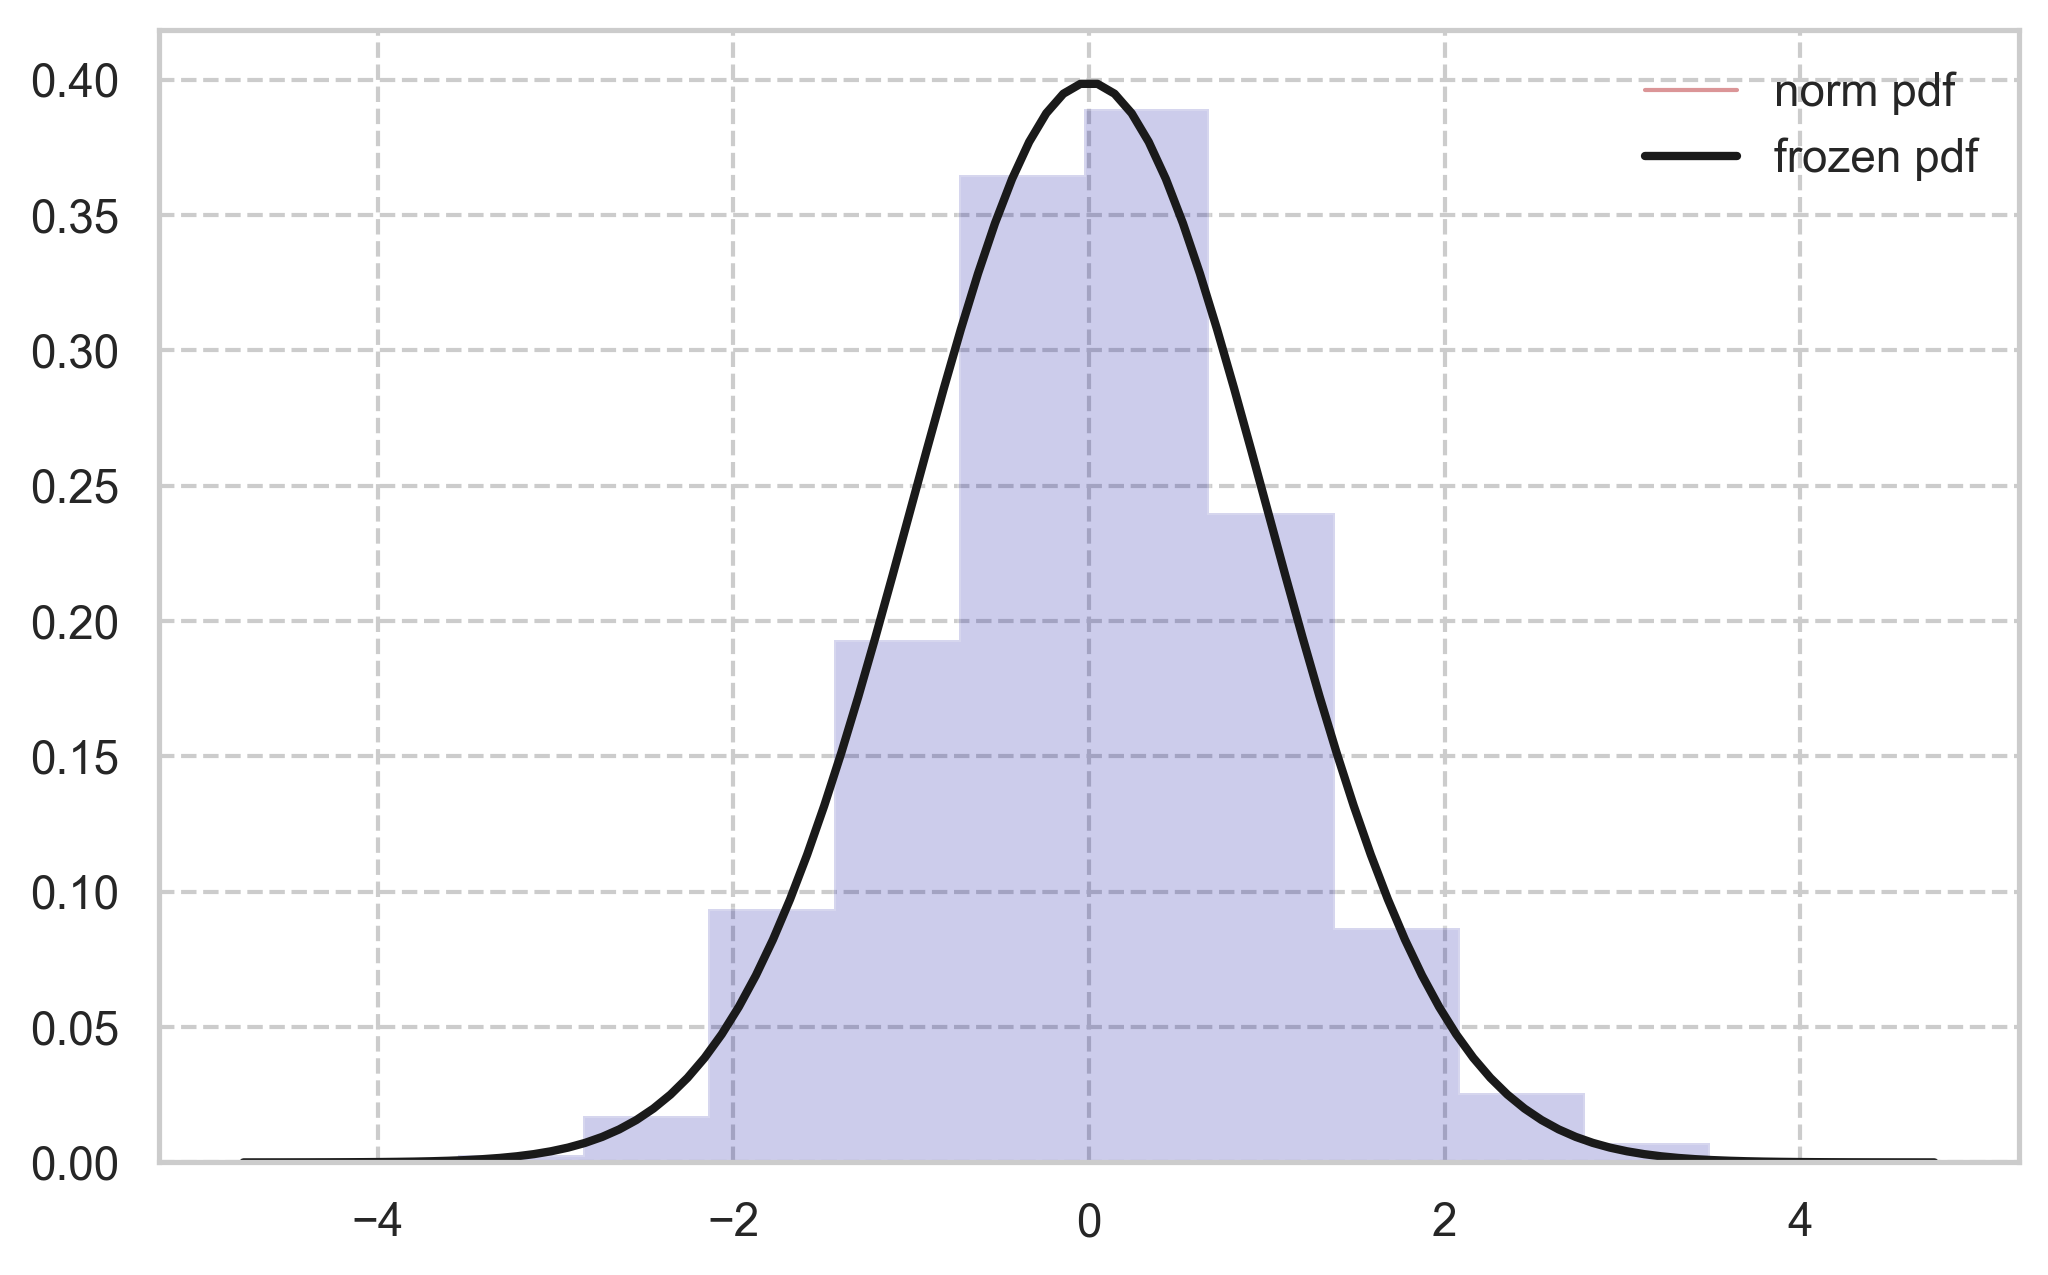

In [1777]:
from scipy.stats import norm
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 1)

mean, var, skew, kurt = norm.stats(moments='mvsk')

x = np.linspace(norm.ppf(0.000001), norm.ppf(0.999999), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=1, alpha=0.6, label='norm pdf')

rv = norm()
ax.plot(x, rv.pdf(x), 'k-', lw=2, label='frozen pdf')

vals = norm.ppf([0.001, 0.5, 0.999])
np.allclose([0.001, 0.5, 0.999], norm.cdf(vals))

r = norm.rvs(size=1000)

ax.hist(r, density=True, histtype='stepfilled', alpha=0.2)
ax.legend(loc='best', frameon=False)
plt.show()

(array([3.0000e+00, 5.0000e+00, 5.9000e+01, 2.3900e+02, 8.3000e+02,
        2.3340e+03, 5.2150e+03, 9.5590e+03, 1.4319e+04, 1.7675e+04,
        1.7463e+04, 1.4353e+04, 9.5070e+03, 5.0910e+03, 2.1790e+03,
        8.7000e+02, 2.3200e+02, 5.7000e+01, 8.0000e+00, 2.0000e+00]),
 array([-4.54540983, -4.09007228, -3.63473474, -3.17939719, -2.72405964,
        -2.2687221 , -1.81338455, -1.358047  , -0.90270946, -0.44737191,
         0.00796564,  0.46330318,  0.91864073,  1.37397828,  1.82931582,
         2.28465337,  2.73999092,  3.19532846,  3.65066601,  4.10600355,
         4.5613411 ]),
 <BarContainer object of 20 artists>)

(array([2.0000e+00, 2.1000e+01, 5.1000e+01, 2.3500e+02, 7.8100e+02,
        2.1000e+03, 4.5730e+03, 8.3390e+03, 1.2758e+04, 1.6363e+04,
        1.7345e+04, 1.4923e+04, 1.0920e+04, 6.4830e+03, 3.1070e+03,
        1.3810e+03, 4.5300e+02, 1.2200e+02, 3.6000e+01, 7.0000e+00]),
 array([3.20889223, 3.38336526, 3.55783829, 3.73231132, 3.90678435,
        4.08125738, 4.25573041, 4.43020344, 4.60467647, 4.7791495 ,
        4.95362253, 5.12809556, 5.30256859, 5.47704162, 5.65151465,
        5.82598768, 6.00046071, 6.17493374, 6.34940677, 6.5238798 ,
        6.69835283]),
 <BarContainer object of 20 artists>)

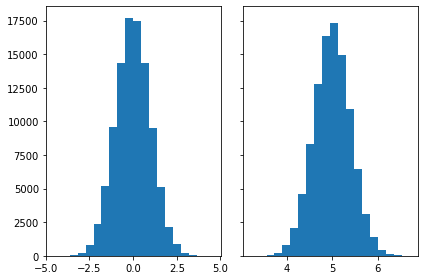

In [1185]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

# Create a random number generator with a fixed seed for reproducibility
rng = np.random.default_rng(19680801)

N_points = 100000
n_bins = 20

# Generate two normal distributions
dist1 = rng.standard_normal(N_points)
dist2 = 0.4 * rng.standard_normal(N_points) + 5

fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

# We can set the number of bins with the *bins* keyword argument.
axs[0].hist(dist1, bins=n_bins)
axs[1].hist(dist2, bins=n_bins)

In [1210]:
dist1 = returns_dax.tail(3283)
dist1 = dist1['last_price'].values
dist1 = dist1*100

(array([3.22960439e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        8.07401097e-04, 1.61480219e-04, 1.93776263e-03, 3.87552527e-03,
        1.11421351e-02, 4.02085746e-02, 1.08030267e-01, 1.77628241e-01,
        1.23532368e-01, 4.56989021e-02, 1.09806549e-02, 3.87552527e-03,
        6.45920878e-04, 4.84440658e-04, 6.45920878e-04, 1.61480219e-04]),
 array([-21.60968634, -19.72339059, -17.83709484, -15.95079909,
        -14.06450334, -12.17820759, -10.29191184,  -8.40561609,
         -6.51932034,  -4.63302459,  -2.74672884,  -0.86043309,
          1.02586266,   2.91215842,   4.79845417,   6.68474992,
          8.57104567,  10.45734142,  12.34363717,  14.22993292,
         16.11622867]),
 <BarContainer object of 20 artists>)

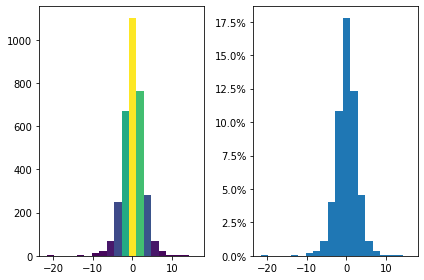

In [1211]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

fig, axs = plt.subplots(1, 2, tight_layout=True)

# N is the count in each bin, bins is the lower-limit of the bin
N, bins, patches = axs[0].hist(dist1, bins=n_bins)

# We'll color code by height, but you could use any scalar
fracs = N / N.max()

# we need to normalize the data to 0..1 for the full range of the colormap
norm = colors.Normalize(fracs.min(), fracs.max())

# Now, we'll loop through our objects and set the color of each accordingly
for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.viridis(norm(thisfrac))
    thispatch.set_facecolor(color)

# We can also normalize our inputs by the total number of counts
axs[1].hist(dist1, bins=n_bins, density=True)

# Now we format the y-axis to display percentage
axs[1].yaxis.set_major_formatter(PercentFormatter(xmax=1))

In [ ]:
# Rolling skew and kurtosis